# 1 - PRE process CSV

## GVI Segmentation data to CBG

In [38]:
import pandas as pd
import os

## from google.colab import drive
## drive.mount('/content/drive')

## Working PATH

file_path = './Data/CBG 0411_elevationgeometryadded.csv'

df_cbg = pd.read_csv(file_path)
print(df_cbg.shape)
print(df_cbg.columns)


(678, 43)
Index(['GEOID', 'crash_count', 'Area_km2', 'MedHHInc', 'Whites', 'Black',
       'Asian', 'Native_Ame', 'Ethics_div', 'MedRent', 'MedHVal', 'Population',
       'Building_d', 'Felony_den', 'Misdemeano', 'Violation.', 'Homeless_d',
       'Unemployme', 'Public', 'Commercial', 'Industrial', 'Residential',
       'Mixed.Use', 'commercial_density', 'tree_density', 'open_space_density',
       'intersection_density', 'road_density', 'traffic_signals_density',
       'parking_meter_density', 'Bus.Stop.Density', 'Bus.Line.Density',
       'Metro.Stop.Density', 'Metro.Line.Density', 'SVI', 'GVI', 'VEI', 'VMI',
       'VHI', 'avg_speed_limit', 'mean_elevation', 'mean_slope', 'geometry'],
      dtype='object')


In [39]:
df_GVI = pd.read_csv('./Data/GVI CBG.csv')
print(df_GVI.shape)
print(df_GVI.columns)
df_GVI.head()

(681, 27)
Index(['geoid', 'date_data_', 'time_data_', 'date_dat_2', 'time_dat_2',
       'lat_mean', 'lon_mean', 'heading_me', 'road_mean', 'sidewalk_m',
       'building_m', 'wall_mean', 'fence_mean', 'pole_mean', 'traffic li',
       'traffic si', 'vegetation', 'terrain_me', 'sky_mean', 'person_mea',
       'rider_mean', 'car_mean', 'truck_mean', 'bus_mean', 'train_mean',
       'motorcycle', 'bicycle_me'],
      dtype='object')


geoid date_data_    time_data_ date_dat_2    time_dat_2  lat_mean  \
0  60750119012  2022/7/21  22:57:39.866  2022/7/25  14:01:00.000   37.7910   
1  60750122021  2022/7/21  22:57:39.866  2022/7/25  14:01:00.000   37.7862   
2  60750135003  2022/7/21  22:57:39.866  2022/7/25  14:01:00.000   37.7897   
3  60750130022  2022/7/21  22:57:39.866  2022/7/25  14:01:00.000   37.7966   
4  60750168022  2022/7/21  22:57:39.866  2022/7/25  14:01:00.000   37.7735   

   lon_mean  heading_me  road_mean  sidewalk_m  building_m  wall_mean  \
0 -122.4132    189.2569     0.4089      0.0210      0.2006     0.0017   
1 -122.4188    184.2402     0.3615      0.0307      0.2764     0.0001   
2 -122.4335    215.2473     0.3947      0.0207      0.1530     0.0007   
3 -122.4353    196.9943     0.3921      0.0184      0.1596     0.0004   
4 -122.4275    230.3557     0.3870      0.0260      0.1105     0.0010   

   fence_mean  pole_mean  traffic li  traffic si  vegetation  terrain_me  \
0      0.0019     0.0029      0.0005      0.0006      0.0309      0.0002   
1      0.0072     0.0040      0.0001      0.0004      0.0239      0.0003   
2      0.0023     0.0058      0.0002      0.0003      0.0719      0.0007   
3      0.0009     0.0047      0.0001      0.0004      0.0652      0.0007   
4      0.0038     0.0059      0.0001      0.0004      0.1065      0.0022   

   sky_mean  person_mea  rider_mean  car_mean  truck_mean  bus_mean  \
0    0.2944      0.0008      0.0003    0.0320      0.0029    0.0000   
1    0.2524      0.0021      0.0002    0.0368      0.0003    0.0017   
2    0.3101      0.0023      0.0002    0.0342      0.0010    0.0006   
3    0.3201      0.0012      0.0002    0.0342      0.0006    0.0006   
4    0.3200      0.0006      0.0002    0.0347      0.0003    0.0001   

   train_mean  motorcycle  bicycle_me  
0      0.0001      0.0001      0.0001  
1      0.0006      0.0005      0.0010  
2      0.0005      0.0004      0.0004  
3      0.0004      0.0002      0.0001  
4      0.0000      0.0004      0.0002

In [40]:
# Rename columns in df_GVI
rename_dict = {
    'road_mean': 'SVI_road',
    'sidewalk_m': 'SVI_sidewalk',
    'building_m': 'SVI_building',
    'wall_mean': 'SVI_wall',
    'fence_mean': 'SVI_fence',
    'pole_mean': 'SVI_pole',
    'traffic li': 'SVI_traffic_light',
    'traffic si': 'SVI_traffic_signal',
    'vegetation': 'SVI_vegetation',
    'terrain_me': 'SVI_terrain',
    'sky_mean': 'SVI_sky',
    'person_mea': 'SVI_person',
    'rider_mean': 'SVI_rider',
    'car_mean': 'SVI_car',
    'truck_mean': 'SVI_truck',
    'bus_mean': 'SVI_bus',
    'train_mean': 'SVI_train',
    'motorcycle': 'SVI_motorcycle',
    'bicycle_me': 'SVI_bicycle'
}

df_GVIz = df_GVI.rename(columns=rename_dict)

# Now df_GVIz has the renamed columns
df_GVIz.columns


Index(['geoid', 'date_data_', 'time_data_', 'date_dat_2', 'time_dat_2',
       'lat_mean', 'lon_mean', 'heading_me', 'SVI_road', 'SVI_sidewalk',
       'SVI_building', 'SVI_wall', 'SVI_fence', 'SVI_pole',
       'SVI_traffic_light', 'SVI_traffic_signal', 'SVI_vegetation',
       'SVI_terrain', 'SVI_sky', 'SVI_person', 'SVI_rider', 'SVI_car',
       'SVI_truck', 'SVI_bus', 'SVI_train', 'SVI_motorcycle', 'SVI_bicycle'],
      dtype='object')

KeyError: "['road_densi', 'intersecti', 'MedRent', 'MedHVal', 'Misdemeano', 'Violation.', 'Bus.Line.D', 'Metro.Line', 'SVI_traf_1', 'SVI_traffi', 'SVI_sky', 'SVI_road', 'SVI_truck', 'SVI_bus', 'SVI_train', 'SVI_bicycl', 'SVI_motorc', 'SVI_fence', 'SVI_terrai', 'SVI_buildi', 'Whites', 'SVI_rider', 'SVI_pole', 'SVI_car', 'avg_speed_', 'SVI_person', 'SVI_wall', 'commerci_1'] not found in axis"

### Save csv / renamed GVI columns

In [41]:
# Save the DataFrame to a CSV file in your Google Drive
output_file_path = './Data/GVI CBG 250429.csv'
df_GVIz.to_csv(output_file_path, index=False)  # index=False prevents writing row indices
print(f"DataFrame saved to: {output_file_path}")

DataFrame saved to: ./Data/GVI CBG 250429.csv


In [42]:
#  JOIN df_GVI join to df_tract_select

df_tract_select = df_cbg

# Merge the dataframes
df_tract_select = pd.merge(df_tract_select, df_GVIz[['geoid', 'SVI_road', 'SVI_sidewalk',
       'SVI_building', 'SVI_wall', 'SVI_fence', 'SVI_pole',
       'SVI_traffic_light', 'SVI_traffic_signal', 'SVI_vegetation',
       'SVI_terrain', 'SVI_sky', 'SVI_person', 'SVI_rider', 'SVI_car',
       'SVI_truck', 'SVI_bus', 'SVI_train', 'SVI_motorcycle', 'SVI_bicycle']], left_on='GEOID', right_on='geoid', how='left')

# Display the merged dataframe
print(df_tract_select.shape)
df_tract_select.head()


(678, 63)


GEOID  crash_count  Area_km2    MedHHInc  Whites   Black   Asian  \
0  60759802001            1    0.9950         NaN 35.4839 23.6559 31.1828   
1  60750105002            7    0.2394 232853.0000 64.6809  0.8511 25.8511   
2  60750255021            1    0.1351 167961.0000 23.8512  0.0000 63.4573   
3  60750327001            1    0.1210 114813.0000 23.0036  0.0000 64.9583   
4  60750215005            1    0.1046 250001.0000 73.5365  0.0000  6.8164   

   Native_Ame  Ethics_div   MedRent      MedHVal  Population  Building_d  \
0      0.0000      0.7144       NaN          NaN    186.9301      0.0360   
1      0.0000      0.5147 3049.0000 2000001.0000   3926.6478      0.2676   
2      0.0000      0.5404 3501.0000 1179300.0000   6763.2116      0.2368   
3      0.0000      0.5234       NaN 1893800.0000   6936.6530      0.3002   
4      0.0000      0.4546 3351.0000 1681300.0000  11920.0815      0.3650   

   Felony_den  Misdemeano  Violation.  Homeless_d  Unemployme  Public  \
0     25.1250    161.8051     15.0750      3.0150         NaN 99.8772   
1    797.8614   2552.3210    522.1606    768.6204      2.1195 18.0222   
2    147.9915    125.7928     96.1945    140.5919     12.9707 34.8550   
3    124.0164    289.3717     66.1421     16.5355      0.0000  1.8838   
4    248.5342    238.9752    105.1491     19.1180      0.0000  0.0000   

   Commercial  Industrial  Residential  Mixed.Use  commercial_density  \
0      0.0000      0.0000       0.1228     0.0000             31.2290   
1     50.5930      0.5675       0.0000    30.8173           8999.9162   
2      0.0000      0.0000      58.6022     6.5428           1532.8794   
3      0.0000      0.0000      98.1162     0.0000            920.5891   
4      0.0000      0.0000      95.3111     4.6889           2401.0301   

   tree_density  open_space_density  intersection_density  road_density  \
0       15.6145              2.6024               96.2894        7.4243   
1     9032.3678             32.4516              400.2367       30.3415   
2     4119.6134             19.1610              900.5667       74.3149   
3     3275.5844              0.0000              470.9991       35.0537   
4    11064.5409              0.0000              420.7991       28.9932   

   traffic_signals_density  parking_meter_density  Bus.Stop.Density  \
0                   0.0000                 0.0000           13.0122   
1                 227.1613              6923.0124          140.6245   
2                  76.6440                 0.0000          153.2888   
3                  42.8181                 0.0000           21.4092   
4                   0.0000                 0.0000           49.5061   

   Bus.Line.Density  Metro.Stop.Density  Metro.Line.Density    SVI    GVI  \
0            2.3302              0.0000              0.0000 0.3049 0.2124   
1           39.6224             64.9036              7.7974 0.3021 0.0931   
2           48.6455             38.3222              8.9162 0.3828 0.0578   
3           15.0611              0.0000              0.0000 0.3997 0.0793   
4            8.2213             24.7530              8.2213 0.3433 0.1088   

     VEI    VMI    VHI  avg_speed_limit  mean_elevation  mean_slope  \
0 0.1865 0.4130 0.0101          16.1496         80.2095     11.7946   
1 0.2081 0.4324 0.0355          20.4749         14.2620      9.9895   
2 0.1515 0.4288 0.0188          63.2820         41.8120      5.0464   
3 0.1266 0.4362 0.0240          20.8494         57.2566      1.8558   
4 0.1913 0.4357 0.0239          15.0000         56.2288      7.0239   

                                            geometry        geoid  SVI_road  \
0  MULTIPOLYGON (((-122.5108 37.78206, -122.5075 ...  60759802001    0.4007   
1  MULTIPOLYGON (((-122.4005 37.79588, -122.3982 ...  60750105002    0.4048   
2  MULTIPOLYGON (((-122.4359 37.73158, -122.4325 ...  60750255021    0.4109   
3  MULTIPOLYGON (((-122.4933 37.76477, -122.4869 ...  60750327001    0.4149   
4  MULTIPOLYGON (((-122.4315 37.74743, -122.427 

### Save csv / CBG + GVI

In [43]:
# Save the DataFrame to a CSV file in your Google Drive
output_file_path = './Data/CBG_GVI_0429.csv'
df_tract_select.to_csv(output_file_path, index=False)  # index=False prevents writing row indices
print(f"DataFrame saved to: {output_file_path}")

DataFrame saved to: ./Data/CBG_GVI_0429.csv


# 2 - PRE process SHAPE FILE

In [44]:
import geopandas as gpd

file_path  = './Data/2020 - Block Groups for San Francisco Clipped to the Shoreline.shp'

try:
    gdf_cbg = gpd.read_file(file_path)
    print(gdf_cbg.shape)
    print(gdf_cbg.columns)

except FileNotFoundError:
    print(f"Error: Shapefile not found at {file_path}")
except Exception as e:
    print(f"An unexpected error occurred while reading the shapefile: {e}")

gdf_cbg.head()

(679, 15)
Index(['intptlon', 'awater', 'mtfcc', 'aland', 'namelsad', 'tractce',
       'statefp', 'data_loade', 'intptlat', 'funcstat', 'countyfp',
       'data_as_of', 'geoid', 'blkgrpce', 'geometry'],
      dtype='object')


intptlon awater  mtfcc     aland       namelsad tractce statefp  \
0  -122.4133260    0.0  G5030   15326.0  Block Group 4   12502       6   
1  -122.4015013    0.0  G5030   53403.0  Block Group 2   17801       6   
2  -122.4380313    0.0  G5030   93047.0  Block Group 2   15802       6   
3  -122.4500341    0.0  G5030  100958.0  Block Group 1   17102       6   
4  -122.4444646    0.0  G5030  120131.0  Block Group 1   20401       6   

                data_loade    intptlat funcstat countyfp  \
0  2022/07/25 14:01:00.000  37.7833638        S       75   
1  2022/07/25 14:01:00.000  37.7805281        S       75   
2  2022/07/25 14:01:00.000  37.7775139        S       75   
3  2022/07/25 14:01:00.000  37.7651880        S       75   
4  2022/07/25 14:01:00.000  37.7596580        S       75   

                data_as_of        geoid blkgrpce  \
0  2022/07/21 22:57:39.878  60750125024        4   
1  2022/07/21 22:57:39.878  60750178012        2   
2  2022/07/21 22:57:39.878  60750158022        2   
3  2022/07/21 22:57:39.878  60750171021        1   
4  2022/07/21 22:57:39.878  60750204011        1   

                                            geometry  
0  POLYGON ((-122.41 37.784, -122.41 37.784, -122...  
1  POLYGON ((-122.4 37.78, -122.4 37.781, -122.4 ...  
2  POLYGON ((-122.44 37.778, -122.44 37.779, -122...  
3  POLYGON ((-122.45 37.765, -122.45 37.766, -122...  
4  POLYGON ((-122.45 37.762, -122.45 37.762, -122...

In [45]:
# Keep only column： 'Tract_ID' and ‘geometry’

# Keep only the desired columns
gdf_cbg = gdf_cbg[['geoid', 'geometry']]

# Now gdf_tracts contains only 'Tract_ID' and 'geometry' columns.
print(gdf_cbg.head())


         geoid                                           geometry
0  60750125024  POLYGON ((-122.41 37.784, -122.41 37.784, -122...
1  60750178012  POLYGON ((-122.4 37.78, -122.4 37.781, -122.4 ...
2  60750158022  POLYGON ((-122.44 37.778, -122.44 37.779, -122...
3  60750171021  POLYGON ((-122.45 37.765, -122.45 37.766, -122...
4  60750204011  POLYGON ((-122.45 37.762, -122.45 37.762, -122...


### Load csv / CBG + GVI

In [56]:
df_cbg = pd.read_csv('Data/CBG_GVI_0429.csv')
print(df_cbg.shape)
print(df_cbg.columns)

(678, 63)
Index(['GEOID', 'crash_count', 'Area_km2', 'MedHHInc', 'Whites', 'Black',
       'Asian', 'Native_Ame', 'Ethics_div', 'MedRent', 'MedHVal', 'Population',
       'Building_d', 'Felony_den', 'Misdemeano', 'Violation.', 'Homeless_d',
       'Unemployme', 'Public', 'Commercial', 'Industrial', 'Residential',
       'Mixed.Use', 'commercial_density', 'tree_density', 'open_space_density',
       'intersection_density', 'road_density', 'traffic_signals_density',
       'parking_meter_density', 'Bus.Stop.Density', 'Bus.Line.Density',
       'Metro.Stop.Density', 'Metro.Line.Density', 'SVI', 'GVI', 'VEI', 'VMI',
       'VHI', 'avg_speed_limit', 'mean_elevation', 'mean_slope', 'geometry',
       'geoid', 'SVI_road', 'SVI_sidewalk', 'SVI_building', 'SVI_wall',
       'SVI_fence', 'SVI_pole', 'SVI_traffic_light', 'SVI_traffic_signal',
       'SVI_vegetation', 'SVI_terrain', 'SVI_sky', 'SVI_person', 'SVI_rider',
       'SVI_car', 'SVI_truck', 'SVI_bus', 'SVI_train', 'SVI_motorcycle',
     

In [57]:
# prompt: drop df_cbg columns 'geoid', 'geometry'
# Drop   columns 'geoid', 'geometry'
df_cbg = df_cbg.drop(columns=['geoid', 'geometry'], errors='ignore')

df_tract_select = df_cbg
df_tract_select.columns


Index(['GEOID', 'crash_count', 'Area_km2', 'MedHHInc', 'Whites', 'Black',
       'Asian', 'Native_Ame', 'Ethics_div', 'MedRent', 'MedHVal', 'Population',
       'Building_d', 'Felony_den', 'Misdemeano', 'Violation.', 'Homeless_d',
       'Unemployme', 'Public', 'Commercial', 'Industrial', 'Residential',
       'Mixed.Use', 'commercial_density', 'tree_density', 'open_space_density',
       'intersection_density', 'road_density', 'traffic_signals_density',
       'parking_meter_density', 'Bus.Stop.Density', 'Bus.Line.Density',
       'Metro.Stop.Density', 'Metro.Line.Density', 'SVI', 'GVI', 'VEI', 'VMI',
       'VHI', 'avg_speed_limit', 'mean_elevation', 'mean_slope', 'SVI_road',
       'SVI_sidewalk', 'SVI_building', 'SVI_wall', 'SVI_fence', 'SVI_pole',
       'SVI_traffic_light', 'SVI_traffic_signal', 'SVI_vegetation',
       'SVI_terrain', 'SVI_sky', 'SVI_person', 'SVI_rider', 'SVI_car',
       'SVI_truck', 'SVI_bus', 'SVI_train', 'SVI_motorcycle', 'SVI_bicycle'],
      dtype='object'

In [58]:
# prompt: Link the data in 'df_tract_select' to gdf_tracts, key = 'Tract_ID'.

gdf_tracts = gdf_cbg

# Merge the dataframes
gdf_tracts = gdf_tracts.astype({'geoid': 'str'})
df_tract_select = df_tract_select.astype({'GEOID': 'str'})
gdf_merged = gdf_tracts.merge(df_tract_select, left_on='geoid', right_on='GEOID',  how='left')

gdf_merged.head()


geoid                                           geometry  \
0  60750125024  POLYGON ((-122.41 37.784, -122.41 37.784, -122...   
1  60750178012  POLYGON ((-122.4 37.78, -122.4 37.781, -122.4 ...   
2  60750158022  POLYGON ((-122.44 37.778, -122.44 37.779, -122...   
3  60750171021  POLYGON ((-122.45 37.765, -122.45 37.766, -122...   
4  60750204011  POLYGON ((-122.45 37.762, -122.45 37.762, -122...   

         GEOID  crash_count  Area_km2    MedHHInc  Whites  Black   Asian  \
0  60750125024       1.0000    0.0153  39632.0000  7.5838 3.7625 36.1552   
1  60750178012       2.0000    0.0534 146205.0000 24.8408 0.0000 67.7282   
2  60750158022       1.0000    0.0854 130956.0000 58.9474 9.7507 10.1939   
3  60750171021       1.0000    0.0943 240294.0000 89.6414 1.4343  3.0279   
4  60750204011       2.0000    0.1150 153795.0000 70.6726 2.8700 11.3004   

   Native_Ame  Ethics_div   MedRent      MedHVal  Population  Building_d  \
0      0.2939      0.7254  977.0000          NaN 111074.8323      0.6067   
1      0.0000      0.4796  665.0000  945200.0000  26478.1708      0.5107   
2      0.0000      0.6293 2046.0000 1435300.0000  21134.2949      0.4045   
3      1.2749      0.1950 2455.0000 1406300.0000  13306.5377      0.3803   
4      0.0000      0.4864 2922.0000 1691200.0000   9693.1169      0.3023   

   Felony_den  Misdemeano  Violation.  Homeless_d  Unemployme  Public  \
0  19981.7159  38200.3391  33629.3584   1697.7929     17.6285  0.0000   
1    243.6067    149.9118     74.9559    187.3897     15.0538  8.9320   
2    690.8163   1463.5938    175.6313    281.0100      8.1100  0.0370   
3     95.4254    222.6592     74.2197     42.4113      2.8729  3.8495   
4    260.8014    330.3484    104.3205    104.3205      1.5385  2.9915   

   Commercial  Industrial  Residential  Mixed.Use  commercial_density  \
0      0.0000      0.0000       0.0000   100.0000          11498.4288   
1      0.0000      0.0127       0.0000    91.0553           7812.5141   
2      0.0000      0.0000      88.7159    11.2471           4729.8839   
3      0.0000      0.0000      83.4103    12.7403           6095.1906   
4      0.0000      0.0000      97.0085     0.0000           1620.8172   

   tree_density  open_space_density  intersection_density  road_density  \
0     6425.5926              0.0000             1521.8509       66.8419   
1     9996.1360              0.0000              242.6247       30.6768   
2     9217.2097              0.0000              363.8372       31.2018   
3    10295.9300              0.0000              439.2930       29.5359   
4     7676.3703              0.0000              945.4767       46.8195   

   traffic_signals_density  parking_meter_density  Bus.Stop.Density  \
0                 507.2836              6256.4980          338.1910   
1                  48.5249              3979.0444           97.0504   
2                  90.9593               879.2733          121.2798   
3                   0.0000               933.4977          302.0156   
4                  67.5340                 0.0000          225.1148   

   Bus.Line.Density  Metro.Stop.Density  Metro.Line.Density    SVI    GVI  \
0           26.3442              0.0000              0.0000 0.2630 0.0381   
1          108.0261             48.5252             11.6326 0.3182 0.0722   
2           15.0030              0.0000              0.0000 0.3447 0.0808   
3           47.9891            164.7358              7.0469 0.3306 0.1114   
4           58.3030             67.5344             20.3097 0.3710 0.0772   

     VEI    VMI    VHI  avg_speed_limit  mean_elevation  mean_slope  SVI_road  \
0 0.2707 0.4399 0.0202          20.0000         26.3644      4.5746    0.4004   
1 0.2169 0.4234 0.0257          59.9140          6.2073      3.2112    0.4034   
2 0.1807 0.4344 0.0209          16.6974         68.4034      4.8633    0.3964   
3 0.2033 0.4344 0.0237          16.0869        101.7755      3.9803    0.3944   
4 0.1649 0.4189 0.0260          20.7231        115.5658 

### Gini-Simpson Index Calculation

In [59]:
# Calculate 1 - HHI (Gini-Simpson Index)

df_cleaned=gdf_merged

def calculate_gini_simpson(series):
    """Calculates the Gini-Simpson index for a given series of land use proportions."""
    total_sum = series.sum()
    if total_sum == 0:  # Handle cases where the sum is zero
        return 0  # or np.nan if you prefer to represent it as missing data
    proportions = series / total_sum  # Calculate proportions
    hhi = (proportions**2).sum()
    gini_simpson_index = 1 - hhi
    return gini_simpson_index

# Apply the function to calculate the index for each tract
df_cleaned['Gini_Simpson'] = df_cleaned.apply(lambda row: calculate_gini_simpson(row[['Public', 'Commercial', 'Industrial', 'Residential', 'Mixed.Use']]), axis=1)

# Display the results or further process as needed
print(df_cleaned[['geoid', 'Gini_Simpson']].head())

         geoid  Gini_Simpson
0  60750125024        0.0000
1  60750178012        0.1629
2  60750158022        0.2003
3  60750171021        0.2866
4  60750204011        0.0580


### GVI Calcu

In [61]:
# 0. Street obstacles (Street Obstructions: Percentage of pixels for walls, fences, etc.)
# Use SVI_wall, SVI_fence for approximate calculations
obstacle_cols = ['SVI_wall', 'SVI_fence']
existing_obstacle_cols = [col for col in obstacle_cols if col in df_cleaned.columns]
if existing_obstacle_cols:
    df_cleaned['SVI_Obstacles'] = df_cleaned[existing_obstacle_cols].sum(axis=1)
    print("Calculated: SVI_Obstacles")
else:
    print("Skipping SVI_Obstacles: Required column missing.")

#1 Spatial walkability (The pixel percentage of sidewalks in roadways)
vis_enclosure_req_cols = ['SVI_road', 'SVI_sidewalk']
if all(col in df_cleaned.columns for col in vis_enclosure_req_cols):
    # Calculate the denominator, handling the possibility of division by zero
    denominator = df_cleaned['SVI_sidewalk'] + df_cleaned['SVI_road']
    # Replace 0 in the denominator with NaN (or a very small number) to avoid errors
    denominator = denominator.replace(0, np.nan)
    df_cleaned['SVI_Walkability'] = df_cleaned['SVI_sidewalk'] / denominator
    # Optionally handle NaN values ​​produced by calculations (e.g., fill with 0)
    # df_cleaned['Visual_Enclosure'].fillna(0, inplace=True)
    print("Calculated: SVI_Walkability (May produce NaN if Sidewalks + Roads = 0)")
else:
    print("Skipping SVI_Walkability: Required column missing. (SVI_sidewa, SVI_road)。")


# 2. Street furniture (percentage of pixels of awnings, benches, street lamps, traffic lights, utility poles, etc.)
# Approximate calculation using SVI_pole, SVI_traffi (traffic light), SVI_traf_1 (traffic sign?)
furniture_cols = ['SVI_pole', 'SVI_traffi', 'SVI_traf_l']
existing_furniture_cols = [col for col in furniture_cols if col in df_cleaned.columns]
if existing_furniture_cols:
    df_cleaned['SVI_Furniture'] = df_cleaned[existing_furniture_cols].sum(axis=1)
    print("Calculated: SVI_Furniture")
else:
    print("Skipping SVI_Furniture: Required column missing.")

# 3. Visual enclosure (Visual closure: Percentage of buildings / (Percentage of sidewalks + Percentage of roads))
vis_enclosure_req_cols = ['SVI_building', 'SVI_sidewalk', 'SVI_road']
if all(col in df_cleaned.columns for col in vis_enclosure_req_cols):
    # Calculate the denominator, handling the possibility of division by zero
    denominator = df_cleaned['SVI_sidewalk'] + df_cleaned['SVI_road']
    # Replace 0 in the denominator with NaN (or a very small number) to avoid errors
    denominator = denominator.replace(0, np.nan)
    df_cleaned['SVI_Enclosure'] = df_cleaned['SVI_building'] / denominator
    # Optionally handle NaN values ​​produced by calculations (e.g., fill with 0)
    # df_cleaned['Visual_Enclosure'].fillna(0, inplace=True)
    print("Calculated: SVI_Enclosure (If sidewalks + roads = 0, NaN may be generated)")
else:
    print("Skipping SVI_Enclosure: Required column missing. (SVI_buildi, SVI_sidewa, SVI_road)。")


# 5. Transit stop Density  (bus + metro stop)
obstacle_cols = ['Bus.Stop.Density', 'Metro.Stop.Density']
existing_obstacle_cols = [col for col in obstacle_cols if col in df_cleaned.columns]
if existing_obstacle_cols:
    df_cleaned['TransitStop_Density'] = df_cleaned[existing_obstacle_cols].sum(axis=1)
    print("Calculated: TransitStop_Density")
else:
    print("Skipping TransitStop_Density: Required column missing.")



Calculated: SVI_Obstacles
Calculated: SVI_Walkability (May produce NaN if Sidewalks + Roads = 0)
Calculated: SVI_Furniture
Calculated: SVI_Enclosure (If sidewalks + roads = 0, NaN may be generated)
Calculated: TransitStop_Density


In [62]:
# df_cleaned=gdf_tracts
print(df_cleaned.columns)
print(df_cleaned.shape)
df_cleaned.describe().T

Index(['geoid', 'geometry', 'GEOID', 'crash_count', 'Area_km2', 'MedHHInc',
       'Whites', 'Black', 'Asian', 'Native_Ame', 'Ethics_div', 'MedRent',
       'MedHVal', 'Population', 'Building_d', 'Felony_den', 'Misdemeano',
       'Violation.', 'Homeless_d', 'Unemployme', 'Public', 'Commercial',
       'Industrial', 'Residential', 'Mixed.Use', 'commercial_density',
       'tree_density', 'open_space_density', 'intersection_density',
       'road_density', 'traffic_signals_density', 'parking_meter_density',
       'Bus.Stop.Density', 'Bus.Line.Density', 'Metro.Stop.Density',
       'Metro.Line.Density', 'SVI', 'GVI', 'VEI', 'VMI', 'VHI',
       'avg_speed_limit', 'mean_elevation', 'mean_slope', 'SVI_road',
       'SVI_sidewalk', 'SVI_building', 'SVI_wall', 'SVI_fence', 'SVI_pole',
       'SVI_traffic_light', 'SVI_traffic_signal', 'SVI_vegetation',
       'SVI_terrain', 'SVI_sky', 'SVI_person', 'SVI_rider', 'SVI_car',
       'SVI_truck', 'SVI_bus', 'SVI_train', 'SVI_motorcycle', 'SVI_bic

count         mean         std         min  \
crash_count             678.0000       1.3083      1.4977      1.0000   
Area_km2                677.0000       0.1792      0.3689      0.0007   
MedHHInc                621.0000  150326.0048  61388.7168  12169.0000   
Whites                  676.0000      43.7493     21.5126      0.0000   
Black                   676.0000       4.7815      8.0490      0.0000   
Asian                   676.0000      33.9572     21.3313      0.0000   
Native_Ame              676.0000       0.5661      2.0958      0.0000   
Ethics_div              676.0000       0.5775      0.1382      0.0000   
MedRent                 599.0000    2368.7679    788.7565    275.0000   
MedHVal                 563.0000 1434334.4405 377868.0486 115600.0000   
Population              677.0000   13525.5175  12361.6760      0.0000   
Building_d              675.0000       0.3593      0.1095      0.0146   
Felony_den              677.0000     649.7740   1357.9801      0.8569   
Misdemeano              677.0000    1041.6760   2709.6838      1.5103   
Violation.              677.0000     480.5156   1634.5923      1.5103   
Homeless_d              677.0000     479.1932   1204.9069      0.3724   
Unemployme              673.0000       5.4247      6.1363      0.0000   
Public                  677.0000      10.2937     17.0786      0.0000   
Commercial              677.0000       4.7119     17.5031      0.0000   
Industrial              677.0000       1.7126      8.9868      0.0000   
Residential             677.0000      64.0789     33.7872      0.0000   
Mixed.Use               677.0000      19.2029     26.9014      0.0000   
commercial_density      678.0000    4964.1660   6123.4843      0.0000   
tree_density            678.0000    6096.1415   3382.4088      0.0000   
open_space_density      678.0000       6.7297     16.2625      0.0000   
intersection_density    678.0000     505.9833    318.0634      0.0000   
road_density            678.0000      32.0836     10.5282      0.0000   
traffic_signals_density 678.0000      55.1589     73.4679      0.0000   
parking_meter_density   678.0000    1718.3831   2791.4577      0.0000   
Bus.Stop.Density        678.0000     102.9091     89.9225      0.0000   
Bus.Line.Density        678.0000      27.1352     36.8340      0.0000   
Metro.Stop.Density      678.0000      17.3638     45.2383      0.0000   
Metro.Line.Density      678.0000       3.6507     13.2263      0.0000   
SVI                     677.0000       0.3508      0.0567      0.1386   
GVI                     677.0000       0.0677      0.0363      0.0014   
VEI                     677.0000       0.1791      0.0632      0.0189   
VMI                     677.0000       0.4262      0.0144      0.3218   
VHI                     677.0000       0.0249      0.0063      0.0101   
avg_speed_limit         678.0000      21.2607     10.4851      0.0000   
mean_elevation          678.0000      57.1735     39.2764     -0.0208   
mean_slope              678.0000       5.9131      3.3202      1.5567   
SVI_road                677.0000       0.3975      0.0135      0.3021   
SVI_sidewalk            677.0000       0.0230      0.0052      0.0115   
SVI_building            677.0000       0.1158      0.0631      0.0059   
SVI_wall                677.0000       0.0014      0.0019      0.0000   
SVI_fence               677.0000       0.0031      0.0024      0.0002   
SVI_pole                677.0000       0.0039      0.0012      0.0010   
SVI_traffic_light       677.0000       0.0002      0.0002      0.0000   
SVI_traffic_signal      677.0000       0.0004      0.0002      0.0001   
SVI_vegetation          677.0000       0.0676      0.0359      0.0012   
SVI_terrain             677.0000       0.0059      0.0079      0.0000   
SVI_sky                 677.0000       0.3508      0.0561      0.1461   
SVI_person              677.0000       0.0010      0.0013      0.0001   
SVI_rider               677.0000       0.0002      0.0001      0.0000   
SVI_car     

### Save Shapefile / CBG + GVI + Index

In [63]:
df_cleaned = df_cleaned.drop(columns=['GEOID'], errors='ignore')
df_cleaned['crash_den'] = df_cleaned['crash_count'] / df_cleaned['Area_km2']

geoids_to_remove = ['60759902000', '60750179031', '60750179032', '60759901000', '60759804011']
df_cleaned = df_cleaned[~df_cleaned['geoid'].isin(geoids_to_remove)]

In [64]:
# Save the GeoDataFrame to a shapefile

output_shapefile_path = './Data/ GVI CBG 250430.shp'
try:
    df_cleaned.to_file(output_shapefile_path)
    print(f"GeoDataFrame saved to: {output_shapefile_path}")
except Exception as e:
    print(f"An error occurred while saving the shapefile: {e}")


GeoDataFrame saved to: ./Data/ GVI CBG 250430.shp


/var/folders/rz/7j5_pwwd1t79sz1mcrfp5xtw0000gn/T/ipykernel_15060/3430123208.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_cleaned.to_file(output_shapefile_path)
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'crash_count' to 'crash_coun'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Residential' to 'Residentia'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'commercial_density' to 'commerci_1'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'tree_density' to 'tree_densi'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'open_space_density' to 'open

#3 -  Viz DATA


### Load Shapefile

In [65]:
# prompt: Read a shape file 

gdf_tracts = gpd.read_file('./Data/ GVI CBG 250430.shp')
print(gdf_tracts.shape)
print(gdf_tracts.columns)
gdf_tracts.head()

(676, 69)
Index(['geoid', 'crash_coun', 'Area_km2', 'MedHHInc', 'Whites', 'Black',
       'Asian', 'Native_Ame', 'Ethics_div', 'MedRent', 'MedHVal', 'Population',
       'Building_d', 'Felony_den', 'Misdemeano', 'Violation.', 'Homeless_d',
       'Unemployme', 'Public', 'Commercial', 'Industrial', 'Residentia',
       'Mixed.Use', 'commerci_1', 'tree_densi', 'open_space', 'intersecti',
       'road_densi', 'traffic_si', 'parking_me', 'Bus.Stop.D', 'Bus.Line.D',
       'Metro.Stop', 'Metro.Line', 'SVI', 'GVI', 'VEI', 'VMI', 'VHI',
       'avg_speed_', 'mean_eleva', 'mean_slope', 'SVI_road', 'SVI_sidewa',
       'SVI_buildi', 'SVI_wall', 'SVI_fence', 'SVI_pole', 'SVI_traffi',
       'SVI_traf_1', 'SVI_vegeta', 'SVI_terrai', 'SVI_sky', 'SVI_person',
       'SVI_rider', 'SVI_car', 'SVI_truck', 'SVI_bus', 'SVI_train',
       'SVI_motorc', 'SVI_bicycl', 'Gini_Simps', 'SVI_Obstac', 'SVI_Walkab',
       'SVI_Furnit', 'SVI_Enclos', 'TransitSto', 'crash_den', 'geometry'],
      dtype='object')


geoid  crash_coun  Area_km2    MedHHInc  Whites  Black   Asian  \
0  60750125024      1.0000    0.0153  39632.0000  7.5838 3.7625 36.1552   
1  60750178012      2.0000    0.0534 146205.0000 24.8408 0.0000 67.7282   
2  60750158022      1.0000    0.0854 130956.0000 58.9474 9.7507 10.1939   
3  60750171021      1.0000    0.0943 240294.0000 89.6414 1.4343  3.0279   
4  60750204011      2.0000    0.1150 153795.0000 70.6726 2.8700 11.3004   

   Native_Ame  Ethics_div   MedRent      MedHVal  Population  Building_d  \
0      0.2939      0.7254  977.0000          NaN 111074.8323      0.6067   
1      0.0000      0.4796  665.0000  945200.0000  26478.1708      0.5107   
2      0.0000      0.6293 2046.0000 1435300.0000  21134.2949      0.4045   
3      1.2749      0.1950 2455.0000 1406300.0000  13306.5377      0.3803   
4      0.0000      0.4864 2922.0000 1691200.0000   9693.1169      0.3023   

   Felony_den  Misdemeano  Violation.  Homeless_d  Unemployme  Public  \
0  19981.7159  38200.3391  33629.3584   1697.7929     17.6285  0.0000   
1    243.6067    149.9118     74.9559    187.3897     15.0538  8.9320   
2    690.8163   1463.5938    175.6313    281.0100      8.1100  0.0370   
3     95.4254    222.6592     74.2197     42.4113      2.8729  3.8495   
4    260.8014    330.3484    104.3205    104.3205      1.5385  2.9915   

   Commercial  Industrial  Residentia  Mixed.Use  commerci_1  tree_densi  \
0      0.0000      0.0000      0.0000   100.0000  11498.4288   6425.5926   
1      0.0000      0.0127      0.0000    91.0553   7812.5141   9996.1360   
2      0.0000      0.0000     88.7159    11.2471   4729.8839   9217.2097   
3      0.0000      0.0000     83.4103    12.7403   6095.1906  10295.9300   
4      0.0000      0.0000     97.0085     0.0000   1620.8172   7676.3703   

   open_space  intersecti  road_densi  traffic_si  parking_me  Bus.Stop.D  \
0      0.0000   1521.8509     66.8419    507.2836   6256.4980    338.1910   
1      0.0000    242.6247     30.6768     48.5249   3979.0444     97.0504   
2      0.0000    363.8372     31.2018     90.9593    879.2733    121.2798   
3      0.0000    439.2930     29.5359      0.0000    933.4977    302.0156   
4      0.0000    945.4767     46.8195     67.5340      0.0000    225.1148   

   Bus.Line.D  Metro.Stop  Metro.Line    SVI    GVI    VEI    VMI    VHI  \
0     26.3442      0.0000      0.0000 0.2630 0.0381 0.2707 0.4399 0.0202   
1    108.0261     48.5252     11.6326 0.3182 0.0722 0.2169 0.4234 0.0257   
2     15.0030      0.0000      0.0000 0.3447 0.0808 0.1807 0.4344 0.0209   
3     47.9891    164.7358      7.0469 0.3306 0.1114 0.2033 0.4344 0.0237   
4     58.3030     67.5344     20.3097 0.3710 0.0772 0.1649 0.4189 0.0260   

   avg_speed_  mean_eleva  mean_slope  SVI_road  SVI_sidewa  SVI_buildi  \
0     20.0000     26.3644      4.5746    0.4004      0.0168      0.2274   
1     59.9140      6.2073      3.2112    0.4034      0.0231      0.1366   
2     16.6974     68.4034      4.8633    0.3964      0.0192      0.1133   
3     16.0869    101.7755      3.9803    0.3944      0.0222      0.0914   
4     20.7231    115.5658     13.0775    0.4004      0.0263      0.0855   

   SVI_wall  SVI_fence  SVI_pole  SVI_traffi  SVI_traf_1  SVI_vegeta  \
0    0.0009     0.0007    0.0039      0.0003      0.0006      0.0483   
1    0.0005     0.0079    0.0047      0.0003      0.0007      0.0718   
2    0.0010     0.0009    0.0055      0.0003      0.0003      0.0748   
3    0.0004     0.0012    0.0056      0.0000      0.0003      0.1127   
4    0.0066     0.0058    0.0050      0.0002      0.0003      0.0794   

   SVI_terrai  SVI_sky  SVI_person  SVI_rider  SVI_car  SVI_truck  SVI_bus  \
0      0.0009   0.2576      0.0032     0.0002   0.0375     0.0005   0.0003   
1      0.0010   0.3245      0.0010     0.0003   0.0213     0.0009   0.0008   
2      0.0059   0.3445      0.0008     0.0002   0.0344     0.0010   0.0006   
3      0.0006   0.3290      0.0008     0.0002   0.0389     0.0007   0.0009   
4      0.00

#### Viz single column

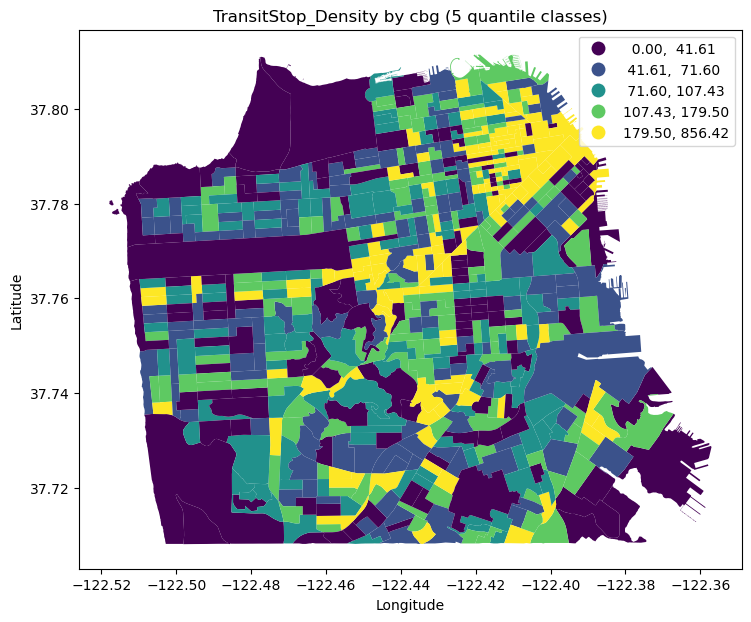

In [66]:
# pip install mapclassify>=2.4.0

import matplotlib.pyplot as plt
import mapclassify # Make sure to import the package after installation

# Assuming gdf_tracts is already defined and loaded as a GeoDataFrame

# Calculate quantiles for 5 classes
quantiles = gdf_tracts['TransitSto'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])

# Create the plot using the calculated quantiles for classification
gdf_tracts.plot(column='TransitSto', cmap='viridis', scheme='User_Defined',
                classification_kwds={'bins': quantiles.tolist()[1:-1]},
                legend=True, figsize=(10, 7)) # scheme is used here
plt.title('TransitStop_Density by cbg (5 quantile classes)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Viz and Export All Columns

In [67]:
# mapclassify is used implicitly by scheme='Quantiles' but good to know it's there

# --- Configuration ---
# Assuming gdf_tracts is your loaded GeoDataFrame
# Example: gdf_tracts = gpd.read_file('your_shapefile.shp')
output_dir = 'X Var Plot'
num_classes = 5 # Number of quantile classes
plot_figsize = (12, 8) # Figure size
plot_dpi = 150 # Resolution for saved JPG

# --- Preparation ---
# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get the name of the geometry column (more robust than assuming 'geometry')
geom_col_name = gdf_tracts.geometry.name

# --- Iteration and Visualization ---
print(f"Starting visualization process. Output directory: {output_dir}")

for column in gdf_tracts.columns:
    # 1. Skip the geometry column itself
    if column == geom_col_name:
        print(f"\nSkipping geometry column: '{column}'")
        continue

    print(f"\nProcessing column: '{column}'...")

    try:
        # 2. Attempt conversion to numeric, coercing errors
        #    Using .copy() to avoid SettingWithCopyWarning if gdf_tracts is a slice
        numeric_series = pd.to_numeric(gdf_tracts[column], errors='coerce').copy()

        # 3. Check if the result is suitable for plotting
        if not pd.api.types.is_numeric_dtype(numeric_series):
            print(f"-> Column '{column}' is not numeric after conversion. Skipping.")
            continue

        if numeric_series.isnull().all():
            print(f"-> Column '{column}' contains only NaN values after conversion. Skipping.")
            continue

        # Check for sufficient unique values for classification (Quantiles need at least k unique values)
        unique_valid_count = numeric_series.nunique(dropna=True)
        if unique_valid_count < num_classes:
             print(f"-> Column '{column}' has only {unique_valid_count} unique non-NaN value(s). "
                   f"Cannot create {num_classes} quantile classes. Skipping.")
             # Optional: Could adjust k here: k_actual = max(1, unique_valid_count)
             # Or use a different scheme like 'NaturalBreaks' which might be more flexible
             continue

        # Check if the GeoDataFrame geometry itself is valid (basic check)
        if gdf_tracts.geometry.is_empty.all() or not gdf_tracts.geometry.is_valid.all():
             print(f"-> Warning: GeoDataFrame contains empty or invalid geometries. Plotting might fail or look incorrect.")
             # Consider cleaning gdf_tracts beforehand if this is the case:
             # gdf_tracts = gdf_tracts[~gdf_tracts.geometry.is_empty]
             # gdf_tracts = gdf_tracts[gdf_tracts.geometry.is_valid]


        # --- Plotting ---
        fig, ax = plt.subplots(1, 1, figsize=plot_figsize)

        # Define how to represent missing values (NaNs) in the plot
        missing_kwds = {
            "color": "lightgrey",
            "edgecolor": "black",
            "hatch": "///",
            "label": "Missing/Invalid Data",
        }

        # Use the Quantiles scheme - often more robust than User_Defined with manual bins
        # Plot the original gdf_tracts but use the converted numeric_series for the 'column' argument
        gdf_tracts.plot(column=numeric_series,   # Use the validated numeric data
                        ax=ax,
                        cmap='viridis',          # Colormap
                        scheme='Quantiles',      # Classification scheme
                        k=num_classes,           # Number of classes
                        legend=True,
                        legend_kwds={            # Customize legend
                            'title': f"{column}\n(Quantiles)",
                            'loc': 'upper left',
                            'fmt': "{:.2f}"      # Format legend numbers (adjust as needed)
                        },
                        missing_kwds=missing_kwds # Specify how to draw NaNs
                       )

        ax.set_title(f'{column} by Census Tract ({num_classes} Quantile Classes)')
        # You might want to turn off axis labels/ticks for cleaner maps
        ax.set_xticks([])
        ax.set_yticks([])
        # ax.set_xlabel('Longitude') # Often omitted for choropleth maps
        # ax.set_ylabel('Latitude')  # Often omitted for choropleth maps


        # --- Saving ---
        # Sanitize column name for filename (replace spaces, slashes etc.) - basic example
        safe_col_name = "".join(c if c.isalnum() else "_" for c in column)
        output_filename = f"{safe_col_name}_quantiles_map.jpg"
        output_path = os.path.join(output_dir, output_filename)

        # Adjust layout and save
        plt.tight_layout()
        plt.savefig(output_path, dpi=plot_dpi, bbox_inches='tight')
        print(f"-> Plot saved successfully to: {output_path}")


    except Exception as e:
        # Print specific error for the problematic column
        print(f"-> ERROR visualizing column '{column}': {e}")
        # This includes the original 'aspect must be finite and positive' error

    finally:
        # --- Cleanup ---
        # Ensure the plot is closed even if errors occurred, preventing memory leaks
        # and display issues in interactive environments (like Jupyter)
        if 'fig' in locals() and plt.fignum_exists(fig.number):
             plt.close(fig)


print("\nFinished processing all columns.")

Starting visualization process. Output directory: X Var Plot

Processing column: 'geoid'...
-> Plot saved successfully to: X Var Plot/geoid_quantiles_map.jpg

Processing column: 'crash_coun'...


/opt/anaconda3/lib/python3.12/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)


-> Plot saved successfully to: X Var Plot/crash_coun_quantiles_map.jpg

Processing column: 'Area_km2'...
-> Plot saved successfully to: X Var Plot/Area_km2_quantiles_map.jpg

Processing column: 'MedHHInc'...
-> Plot saved successfully to: X Var Plot/MedHHInc_quantiles_map.jpg

Processing column: 'Whites'...
-> Plot saved successfully to: X Var Plot/Whites_quantiles_map.jpg

Processing column: 'Black'...
-> Plot saved successfully to: X Var Plot/Black_quantiles_map.jpg

Processing column: 'Asian'...
-> Plot saved successfully to: X Var Plot/Asian_quantiles_map.jpg

Processing column: 'Native_Ame'...


/opt/anaconda3/lib/python3.12/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


-> Plot saved successfully to: X Var Plot/Native_Ame_quantiles_map.jpg

Processing column: 'Ethics_div'...
-> Plot saved successfully to: X Var Plot/Ethics_div_quantiles_map.jpg

Processing column: 'MedRent'...
-> Plot saved successfully to: X Var Plot/MedRent_quantiles_map.jpg

Processing column: 'MedHVal'...
-> Plot saved successfully to: X Var Plot/MedHVal_quantiles_map.jpg

Processing column: 'Population'...
-> Plot saved successfully to: X Var Plot/Population_quantiles_map.jpg

Processing column: 'Building_d'...
-> Plot saved successfully to: X Var Plot/Building_d_quantiles_map.jpg

Processing column: 'Felony_den'...
-> Plot saved successfully to: X Var Plot/Felony_den_quantiles_map.jpg

Processing column: 'Misdemeano'...
-> Plot saved successfully to: X Var Plot/Misdemeano_quantiles_map.jpg

Processing column: 'Violation.'...
-> Plot saved successfully to: X Var Plot/Violation__quantiles_map.jpg

Processing column: 'Homeless_d'...
-> Plot saved successfully to: X Var Plot/Homeles

/opt/anaconda3/lib/python3.12/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
/opt/anaconda3/lib/python3.12/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)


-> Plot saved successfully to: X Var Plot/Industrial_quantiles_map.jpg

Processing column: 'Residentia'...
-> Plot saved successfully to: X Var Plot/Residentia_quantiles_map.jpg

Processing column: 'Mixed.Use'...
-> Plot saved successfully to: X Var Plot/Mixed_Use_quantiles_map.jpg

Processing column: 'commerci_1'...
-> Plot saved successfully to: X Var Plot/commerci_1_quantiles_map.jpg

Processing column: 'tree_densi'...
-> Plot saved successfully to: X Var Plot/tree_densi_quantiles_map.jpg

Processing column: 'open_space'...
-> Plot saved successfully to: X Var Plot/open_space_quantiles_map.jpg

Processing column: 'intersecti'...


/opt/anaconda3/lib/python3.12/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


-> Plot saved successfully to: X Var Plot/intersecti_quantiles_map.jpg

Processing column: 'road_densi'...
-> Plot saved successfully to: X Var Plot/road_densi_quantiles_map.jpg

Processing column: 'traffic_si'...
-> Plot saved successfully to: X Var Plot/traffic_si_quantiles_map.jpg

Processing column: 'parking_me'...
-> Plot saved successfully to: X Var Plot/parking_me_quantiles_map.jpg

Processing column: 'Bus.Stop.D'...


/opt/anaconda3/lib/python3.12/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


-> Plot saved successfully to: X Var Plot/Bus_Stop_D_quantiles_map.jpg

Processing column: 'Bus.Line.D'...
-> Plot saved successfully to: X Var Plot/Bus_Line_D_quantiles_map.jpg

Processing column: 'Metro.Stop'...


/opt/anaconda3/lib/python3.12/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)
/opt/anaconda3/lib/python3.12/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)


-> Plot saved successfully to: X Var Plot/Metro_Stop_quantiles_map.jpg

Processing column: 'Metro.Line'...
-> Plot saved successfully to: X Var Plot/Metro_Line_quantiles_map.jpg

Processing column: 'SVI'...
-> Plot saved successfully to: X Var Plot/SVI_quantiles_map.jpg

Processing column: 'GVI'...
-> Plot saved successfully to: X Var Plot/GVI_quantiles_map.jpg

Processing column: 'VEI'...
-> Plot saved successfully to: X Var Plot/VEI_quantiles_map.jpg

Processing column: 'VMI'...
-> Plot saved successfully to: X Var Plot/VMI_quantiles_map.jpg

Processing column: 'VHI'...
-> Plot saved successfully to: X Var Plot/VHI_quantiles_map.jpg

Processing column: 'avg_speed_'...
-> Plot saved successfully to: X Var Plot/avg_speed__quantiles_map.jpg

Processing column: 'mean_eleva'...
-> Plot saved successfully to: X Var Plot/mean_eleva_quantiles_map.jpg

Processing column: 'mean_slope'...
-> Plot saved successfully to: X Var Plot/mean_slope_quantiles_map.jpg

Processing column: 'SVI_road'...
->

#### Viz GVI Points

#4 - VIF Analysis

In [68]:
df_cleaned=gdf_tracts
df_cleaned.head()

geoid  crash_coun  Area_km2    MedHHInc  Whites  Black   Asian  \
0  60750125024      1.0000    0.0153  39632.0000  7.5838 3.7625 36.1552   
1  60750178012      2.0000    0.0534 146205.0000 24.8408 0.0000 67.7282   
2  60750158022      1.0000    0.0854 130956.0000 58.9474 9.7507 10.1939   
3  60750171021      1.0000    0.0943 240294.0000 89.6414 1.4343  3.0279   
4  60750204011      2.0000    0.1150 153795.0000 70.6726 2.8700 11.3004   

   Native_Ame  Ethics_div   MedRent      MedHVal  Population  Building_d  \
0      0.2939      0.7254  977.0000          NaN 111074.8323      0.6067   
1      0.0000      0.4796  665.0000  945200.0000  26478.1708      0.5107   
2      0.0000      0.6293 2046.0000 1435300.0000  21134.2949      0.4045   
3      1.2749      0.1950 2455.0000 1406300.0000  13306.5377      0.3803   
4      0.0000      0.4864 2922.0000 1691200.0000   9693.1169      0.3023   

   Felony_den  Misdemeano  Violation.  Homeless_d  Unemployme  Public  \
0  19981.7159  38200.3391  33629.3584   1697.7929     17.6285  0.0000   
1    243.6067    149.9118     74.9559    187.3897     15.0538  8.9320   
2    690.8163   1463.5938    175.6313    281.0100      8.1100  0.0370   
3     95.4254    222.6592     74.2197     42.4113      2.8729  3.8495   
4    260.8014    330.3484    104.3205    104.3205      1.5385  2.9915   

   Commercial  Industrial  Residentia  Mixed.Use  commerci_1  tree_densi  \
0      0.0000      0.0000      0.0000   100.0000  11498.4288   6425.5926   
1      0.0000      0.0127      0.0000    91.0553   7812.5141   9996.1360   
2      0.0000      0.0000     88.7159    11.2471   4729.8839   9217.2097   
3      0.0000      0.0000     83.4103    12.7403   6095.1906  10295.9300   
4      0.0000      0.0000     97.0085     0.0000   1620.8172   7676.3703   

   open_space  intersecti  road_densi  traffic_si  parking_me  Bus.Stop.D  \
0      0.0000   1521.8509     66.8419    507.2836   6256.4980    338.1910   
1      0.0000    242.6247     30.6768     48.5249   3979.0444     97.0504   
2      0.0000    363.8372     31.2018     90.9593    879.2733    121.2798   
3      0.0000    439.2930     29.5359      0.0000    933.4977    302.0156   
4      0.0000    945.4767     46.8195     67.5340      0.0000    225.1148   

   Bus.Line.D  Metro.Stop  Metro.Line    SVI    GVI    VEI    VMI    VHI  \
0     26.3442      0.0000      0.0000 0.2630 0.0381 0.2707 0.4399 0.0202   
1    108.0261     48.5252     11.6326 0.3182 0.0722 0.2169 0.4234 0.0257   
2     15.0030      0.0000      0.0000 0.3447 0.0808 0.1807 0.4344 0.0209   
3     47.9891    164.7358      7.0469 0.3306 0.1114 0.2033 0.4344 0.0237   
4     58.3030     67.5344     20.3097 0.3710 0.0772 0.1649 0.4189 0.0260   

   avg_speed_  mean_eleva  mean_slope  SVI_road  SVI_sidewa  SVI_buildi  \
0     20.0000     26.3644      4.5746    0.4004      0.0168      0.2274   
1     59.9140      6.2073      3.2112    0.4034      0.0231      0.1366   
2     16.6974     68.4034      4.8633    0.3964      0.0192      0.1133   
3     16.0869    101.7755      3.9803    0.3944      0.0222      0.0914   
4     20.7231    115.5658     13.0775    0.4004      0.0263      0.0855   

   SVI_wall  SVI_fence  SVI_pole  SVI_traffi  SVI_traf_1  SVI_vegeta  \
0    0.0009     0.0007    0.0039      0.0003      0.0006      0.0483   
1    0.0005     0.0079    0.0047      0.0003      0.0007      0.0718   
2    0.0010     0.0009    0.0055      0.0003      0.0003      0.0748   
3    0.0004     0.0012    0.0056      0.0000      0.0003      0.1127   
4    0.0066     0.0058    0.0050      0.0002      0.0003      0.0794   

   SVI_terrai  SVI_sky  SVI_person  SVI_rider  SVI_car  SVI_truck  SVI_bus  \
0      0.0009   0.2576      0.0032     0.0002   0.0375     0.0005   0.0003   
1      0.0010   0.3245      0.0010     0.0003   0.0213     0.0009   0.0008   
2      0.0059   0.3445      0.0008     0.0002   0.0344     0.0010   0.0006   
3      0.0006   0.3290      0.0008     0.0002   0.0389     0.0007   0.0009   
4      0.00

In [69]:
df_cleaned.describe().T

count         mean         std         min          25%  \
crash_coun 676.0000       1.3092      1.4998      1.0000       1.0000   
Area_km2   676.0000       0.1755      0.3563      0.0007       0.0746   
MedHHInc   620.0000  150413.6274  61399.4068  12169.0000  109297.5000   
Whites     675.0000      43.7559     21.5279      0.0000      27.7086   
Black      675.0000       4.7649      8.0432      0.0000       0.0000   
Asian      675.0000      33.9921     21.3277      0.0000      15.7964   
Native_Ame 675.0000       0.5649      2.0972      0.0000       0.0000   
Ethics_div 675.0000       0.5772      0.1381      0.0000       0.4981   
MedRent    598.0000    2368.3880    789.3619    275.0000    1888.0000   
MedHVal    563.0000 1434334.4405 377868.0486 115600.0000 1140000.0000   
Population 676.0000   13543.7982  12361.6683      0.0000    7036.9297   
Building_d 674.0000       0.3597      0.1091      0.0146       0.2985   
Felony_den 676.0000     650.6372   1358.7998      0.8569     129.1879   
Misdemeano 676.0000    1043.1205   2711.4294      1.5103     181.4979   
Violation. 676.0000     481.1670   1635.7148      1.5103      73.0892   
Homeless_d 676.0000     479.9015   1205.6580      0.4284      24.3016   
Unemployme 672.0000       5.4139      6.1345      0.0000       1.1619   
Public     676.0000      10.1925     16.8866      0.0000       0.0000   
Commercial 676.0000       4.7189     17.5151      0.0000       0.0000   
Industrial 676.0000       1.7151      8.9932      0.0000       0.0000   
Residentia 676.0000      64.1538     33.7559      0.0000      42.3669   
Mixed.Use  676.0000      19.2197     26.9177      0.0000       0.0029   
commerci_1 676.0000    4978.3824   6126.9465      0.0000    1409.2919   
tree_densi 676.0000    6114.1665   3371.0951      0.0000    3645.8115   
open_space 676.0000       6.7496     16.2824      0.0000       0.0000   
intersecti 676.0000     507.0996    317.7923      0.0000     306.0442   
road_densi 676.0000      32.1464     10.4633      6.1284      25.8778   
traffic_si 676.0000      55.3139     73.5210      0.0000       0.0000   
parking_me 676.0000    1723.4671   2794.0202      0.0000       0.0000   
Bus.Stop.D 676.0000     103.1959     89.8999      0.0000      44.0597   
Bus.Line.D 676.0000      27.2088     36.8634      0.0000       8.0641   
Metro.Stop 676.0000      17.4152     45.2954      0.0000       0.0000   
Metro.Line 676.0000       3.6615     13.2444      0.0000       0.0000   
SVI        676.0000       0.3507      0.0567      0.1386       0.3169   
GVI        676.0000       0.0677      0.0364      0.0014       0.0400   
VEI        676.0000       0.1792      0.0632      0.0189       0.1272   
VMI        676.0000       0.4262      0.0144      0.3218       0.4171   
VHI        676.0000       0.0249      0.0063      0.0101       0.0211   
avg_speed_ 676.0000      21.3236     10.4364     15.0000      16.0955   
mean_eleva 676.0000      57.3088     39.2553     -0.0208      27.2477   
mean_slope 676.0000       5.9028      3.3147      1.5567       3.3119   
SVI_road   676.0000       0.3975      0.0135      0.3021       0.3899   
SVI_sidewa 676.0000       0.0230      0.0052      0.0115       0.0196   
SVI_buildi 676.0000       0.1159      0.0631      0.0059       0.0746   
SVI_wall   676.0000       0.0014      0.0018      0.0000       0.0004   
SVI_fence  676.0000       0.0030      0.0024      0.0002       0.0013   
SVI_pole   676.0000       0.0039      0.0012      0.0010       0.0031   
SVI_traffi 676.0000       0.0002      0.0002      0.0000       0.0000   
SVI_traf_1 676.0000       0.0004      0.0002      0.0001       0.0002   
SVI_vegeta 676.0000       0.0676      0.0359      0.0012       0.0406   
SVI_terrai 676.0000       0.0059      0.0079      0.0000       0.0011   
SVI_sky    676.0000       0.3507      0.0561      0.1461       0.3183   
SVI_person 676.0000       0.0010      0.0013      0.0001       0.0003   
SVI_rider  676.0000       0.0002      0.0001      0.0000       0.0001   

### Standardization for VIF

In [70]:
# Standardization to df_cleaned
pd.set_option("display.max_rows", None, "display.max_columns", None)

import numpy as np
from sklearn.preprocessing import StandardScaler
pd.options.display.float_format = '{:.4f}'.format


# Assuming df_cleaned is your DataFrame
# Select only numeric columns for standardization
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')  # 强制转为数值型，非法值变成 NaN


numeric_cols = df_cleaned.select_dtypes(include=np.number).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numeric columns
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Drop rows with any NaN values in df_cleaned


df_cleaned.describe().T

count    mean    std     min     25%     50%     75%     max
geoid      676.0000 -0.0000 1.0007 -0.2783 -0.2086 -0.1238 -0.0068 11.4342
crash_coun 676.0000 -0.0000 1.0007 -0.2063 -0.2063 -0.2063 -0.2063 13.8058
Area_km2   676.0000 -0.0000 1.0007 -0.4909 -0.2834 -0.1629 -0.0210 13.3296
MedHHInc   620.0000  0.0000 1.0008 -2.2534 -0.6702 -0.0070  0.7125  1.6233
Whites     675.0000  0.0000 1.0007 -2.0340 -0.7460 -0.0264  0.7709  2.5310
Black      675.0000  0.0000 1.0007 -0.5928 -0.5928 -0.3828  0.1184  6.8906
Asian      675.0000  0.0000 1.0007 -1.5950 -0.8538 -0.2073  0.7095  3.0972
Native_Ame 675.0000  0.0000 1.0007 -0.2696 -0.2696 -0.2696 -0.2696 14.0424
Ethics_div 675.0000 -0.0000 1.0007 -4.1826 -0.5735  0.1191  0.6924  2.2747
MedRent    598.0000  0.0000 1.0008 -2.6542 -0.6091  0.0160  0.8458  1.4360
MedHVal    563.0000 -0.0000 1.0009 -3.4930 -0.7796 -0.0621  0.7682  1.4983
Population 676.0000  0.0000 1.0007 -1.0964 -0.5268 -0.2543  0.1312  7.8956
Building_d 674.0000  0.0000 1.0007 -3.1654 -0.5611 -0.0145  0.6688  2.6843
Felony_den 676.0000  0.0000 1.0007 -0.4786 -0.3840 -0.2683 -0.0092 14.2371
Misdemeano 676.0000  0.0000 1.0007 -0.3844 -0.3180 -0.2594 -0.0383 13.7141
Violation. 676.0000  0.0000 1.0007 -0.2935 -0.2497 -0.2029 -0.0582 20.2803
Homeless_d 676.0000 -0.0000 1.0007 -0.3980 -0.3782 -0.3254 -0.1038  9.8337
Unemployme 672.0000  0.0000 1.0007 -0.8832 -0.6936 -0.2821  0.3582  8.1605
Public     676.0000 -0.0000 1.0007 -0.6040 -0.6040 -0.4565  0.1973  5.3149
Commercial 676.0000  0.0000 1.0007 -0.2696 -0.2696 -0.2696 -0.2696  5.4440
Industrial 676.0000 -0.0000 1.0007 -0.1909 -0.1909 -0.1909 -0.1909 10.9369
Residentia 676.0000 -0.0000 1.0007 -1.9019 -0.6459  0.3733  0.8067  1.0627
Mixed.Use  676.0000  0.0000 1.0007 -0.7145 -0.7144 -0.4284  0.2051  3.0032
commerci_1 676.0000 -0.0000 1.0007 -0.8131 -0.5830 -0.3341  0.2682 11.4807
tree_densi 676.0000  0.0000 1.0007 -1.8150 -0.7328 -0.2224  0.7359  3.4907
open_space 676.0000  0.0000 1.0007 -0.4148 -0.4148 -0.4148 -0.1596 10.0292
intersecti 676.0000 -0.0000 1.0007 -1.5969 -0.6331 -0.2074  0.4163  5.8139
road_densi 676.0000  0.0000 1.0007 -2.4884 -0.5996 -0.1499  0.5099  4.8788
traffic_si 676.0000  0.0000 1.0007 -0.7529 -0.7529 -0.3724  0.3600  6.1520
parking_me 676.0000  0.0000 1.0007 -0.6173 -0.6173 -0.5539  0.2749  7.4812
Bus.Stop.D 676.0000  0.0000 1.0007 -1.1487 -0.6583 -0.2477  0.4028  6.3446
Bus.Line.D 676.0000 -0.0000 1.0007 -0.7386 -0.5197 -0.2584  0.1625 11.1273
Metro.Stop 676.0000 -0.0000 1.0007 -0.3848 -0.3848 -0.3848 -0.3848  8.4685
Metro.Line 676.0000 -0.0000 1.0007 -0.2767 -0.2767 -0.2767 -0.2767 12.2522
SVI        676.0000 -0.0000 1.0007 -3.7408 -0.5955  0.0738  0.8397  1.9841
GVI        676.0000 -0.0000 1.0007 -1.8240 -0.7643 -0.1204  0.5740  3.9811
VEI        676.0000  0.0000 1.0007 -2.5386 -0.8230 -0.1184  0.6193  3.9302
VMI        676.0000 -0.0000 1.0007 -7.2362 -0.6252  0.1936  0.7200  4.5476
VHI        676.0000  0.0000 1.0007 -2.3655 -0.6128 -0.1075  0.5035  6.4561
avg_speed_ 676.0000 -0.0000 1.0007 -0.6064 -0.5013 -0.3168 -0.1186  4.8304
mean_eleva 676.0000 -0.0000 1.0007 -1.4615 -0.7664 -0.1478  0.5488  4.4024
mean_slope 676.0000  0.0000 1.0007 -1.3122 -0.7822 -0.2384  0.5016  6.0892
SVI_road   676.0000 -0.0000 1.0007 -7.0805 -0.5619  0.1201  0.6840  4.1446
SVI_sidewa 676.0000  0.0000 1.0007 -2.1947 -0.6508 -0.0800  0.5766  6.0078
SVI_buildi 676.0000  0.0000 1.0007 -1.7445 -0.6548 -0.2983  0.3769  4.7993
SVI_wall   676.0000  0.0000 1.0007 -0.7354 -0.5404 -0.3471  0.0762  7.1000
SVI_fence  676.0000  0.0000 1.0007 -1.1813 -0.7136 -0.2320  0.3935  6.9768
SVI_pole   676.0000 -0.0000 1.0007 -2.3987 -0.6558  0.0003  0.6118  3.3785
SVI_traffi 676.0000 -0.0000 1.0007 -1.0450 -0.8932 -0.2620  0.6552  3.9788
SVI_traf_1 676.0000  0.0000 1.0007 -1.5228 -0.8032 -0.1699  0.5210  3.8833
SVI_vegeta 676.0000  0.0000 1.0007 -1.8524 -0.7519 -0.1351  0.5719  4.7497
SVI_terrai 676.0000 -0.0000 1.0007 -0.7485 -0.6070 -0.3695  0.1834  6.3239
SVI_sky    676.0000 -0.0000 1.0007 -3.6

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# df_cleaned=gdf_tracts
# Separate X and Y
X = df_cleaned.drop(columns=['crash_den', 'geometry',  'Public',
       'Commercial', 'Industrial', 'Residentia', 'Mixed.Use', 'crash_coun','Area_km2', 'geoid'])
X = X.apply(pd.to_numeric, errors='coerce')  # Forced to a numeric type, illegal values ​​become NaN

# Instead of dropping all columns with ANY NaNs, drop only rows with NaNs:
X = X.dropna(axis=0, how='any')  # Remove rows that still have NaN

y_new = df_cleaned['crash_den'][X.index]  # Align y_new with X's index

# Calculate VIF
pd.options.display.float_format = '{:.1f}'.format
vif_data_new = pd.DataFrame()
vif_data_new["Variable"] = X.columns
vif_data_new["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data_new

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variable          VIF
0     MedHHInc          2.5
1       Whites          9.9
2        Black          1.8
3        Asian          7.6
4   Native_Ame          1.1
5   Ethics_div          2.6
6      MedRent          1.9
7      MedHVal          2.0
8   Population          3.1
9   Building_d          6.8
10  Felony_den         10.3
11  Misdemeano          5.2
12  Violation.          8.0
13  Homeless_d          1.8
14  Unemployme          1.2
15  commerci_1          4.0
16  tree_densi          3.7
17  open_space          1.4
18  intersecti          4.8
19  road_densi          4.3
20  traffic_si          3.7
21  parking_me          4.0
22  Bus.Stop.D          inf
23  Bus.Line.D          4.8
24  Metro.Stop          inf
25  Metro.Line          4.2
26         SVI        560.2
27         GVI         53.1
28         VEI        409.7
29         VMI         32.4
30         VHI         18.2
31  avg_speed_          2.8
32  mean_eleva          2.5
33  mean_slope          3.7
34    SVI_road  148003872.6
35  SVI_sidewa   18421964.1
36  SVI_buildi 1970471206.0
37    SVI_wall          inf
38   SVI_fence          inf
39    SVI_pole          inf
40  SVI_traffi      20369.7
41  SVI_traf_1      20886.4
42  SVI_vegeta  944421916.3
43  SVI_terrai   36249340.6
44     SVI_sky 1934025416.1
45  SVI_person     691899.9
46   SVI_rider       7258.0
47     SVI_car   39303832.1
48   SVI_truck     266319.3
49     SVI_bus     188973.8
50   SVI_train     187617.8
51  SVI_motorc      10658.6
52  SVI_bicycl       8639.8
53  Gini_Simps          2.1
54  SVI_Obstac          inf
55  SVI_Walkab       1587.1
56  SVI_Furnit          inf
57  SVI_Enclos        300.9
58  TransitSto          inf

### Correlation Matrix

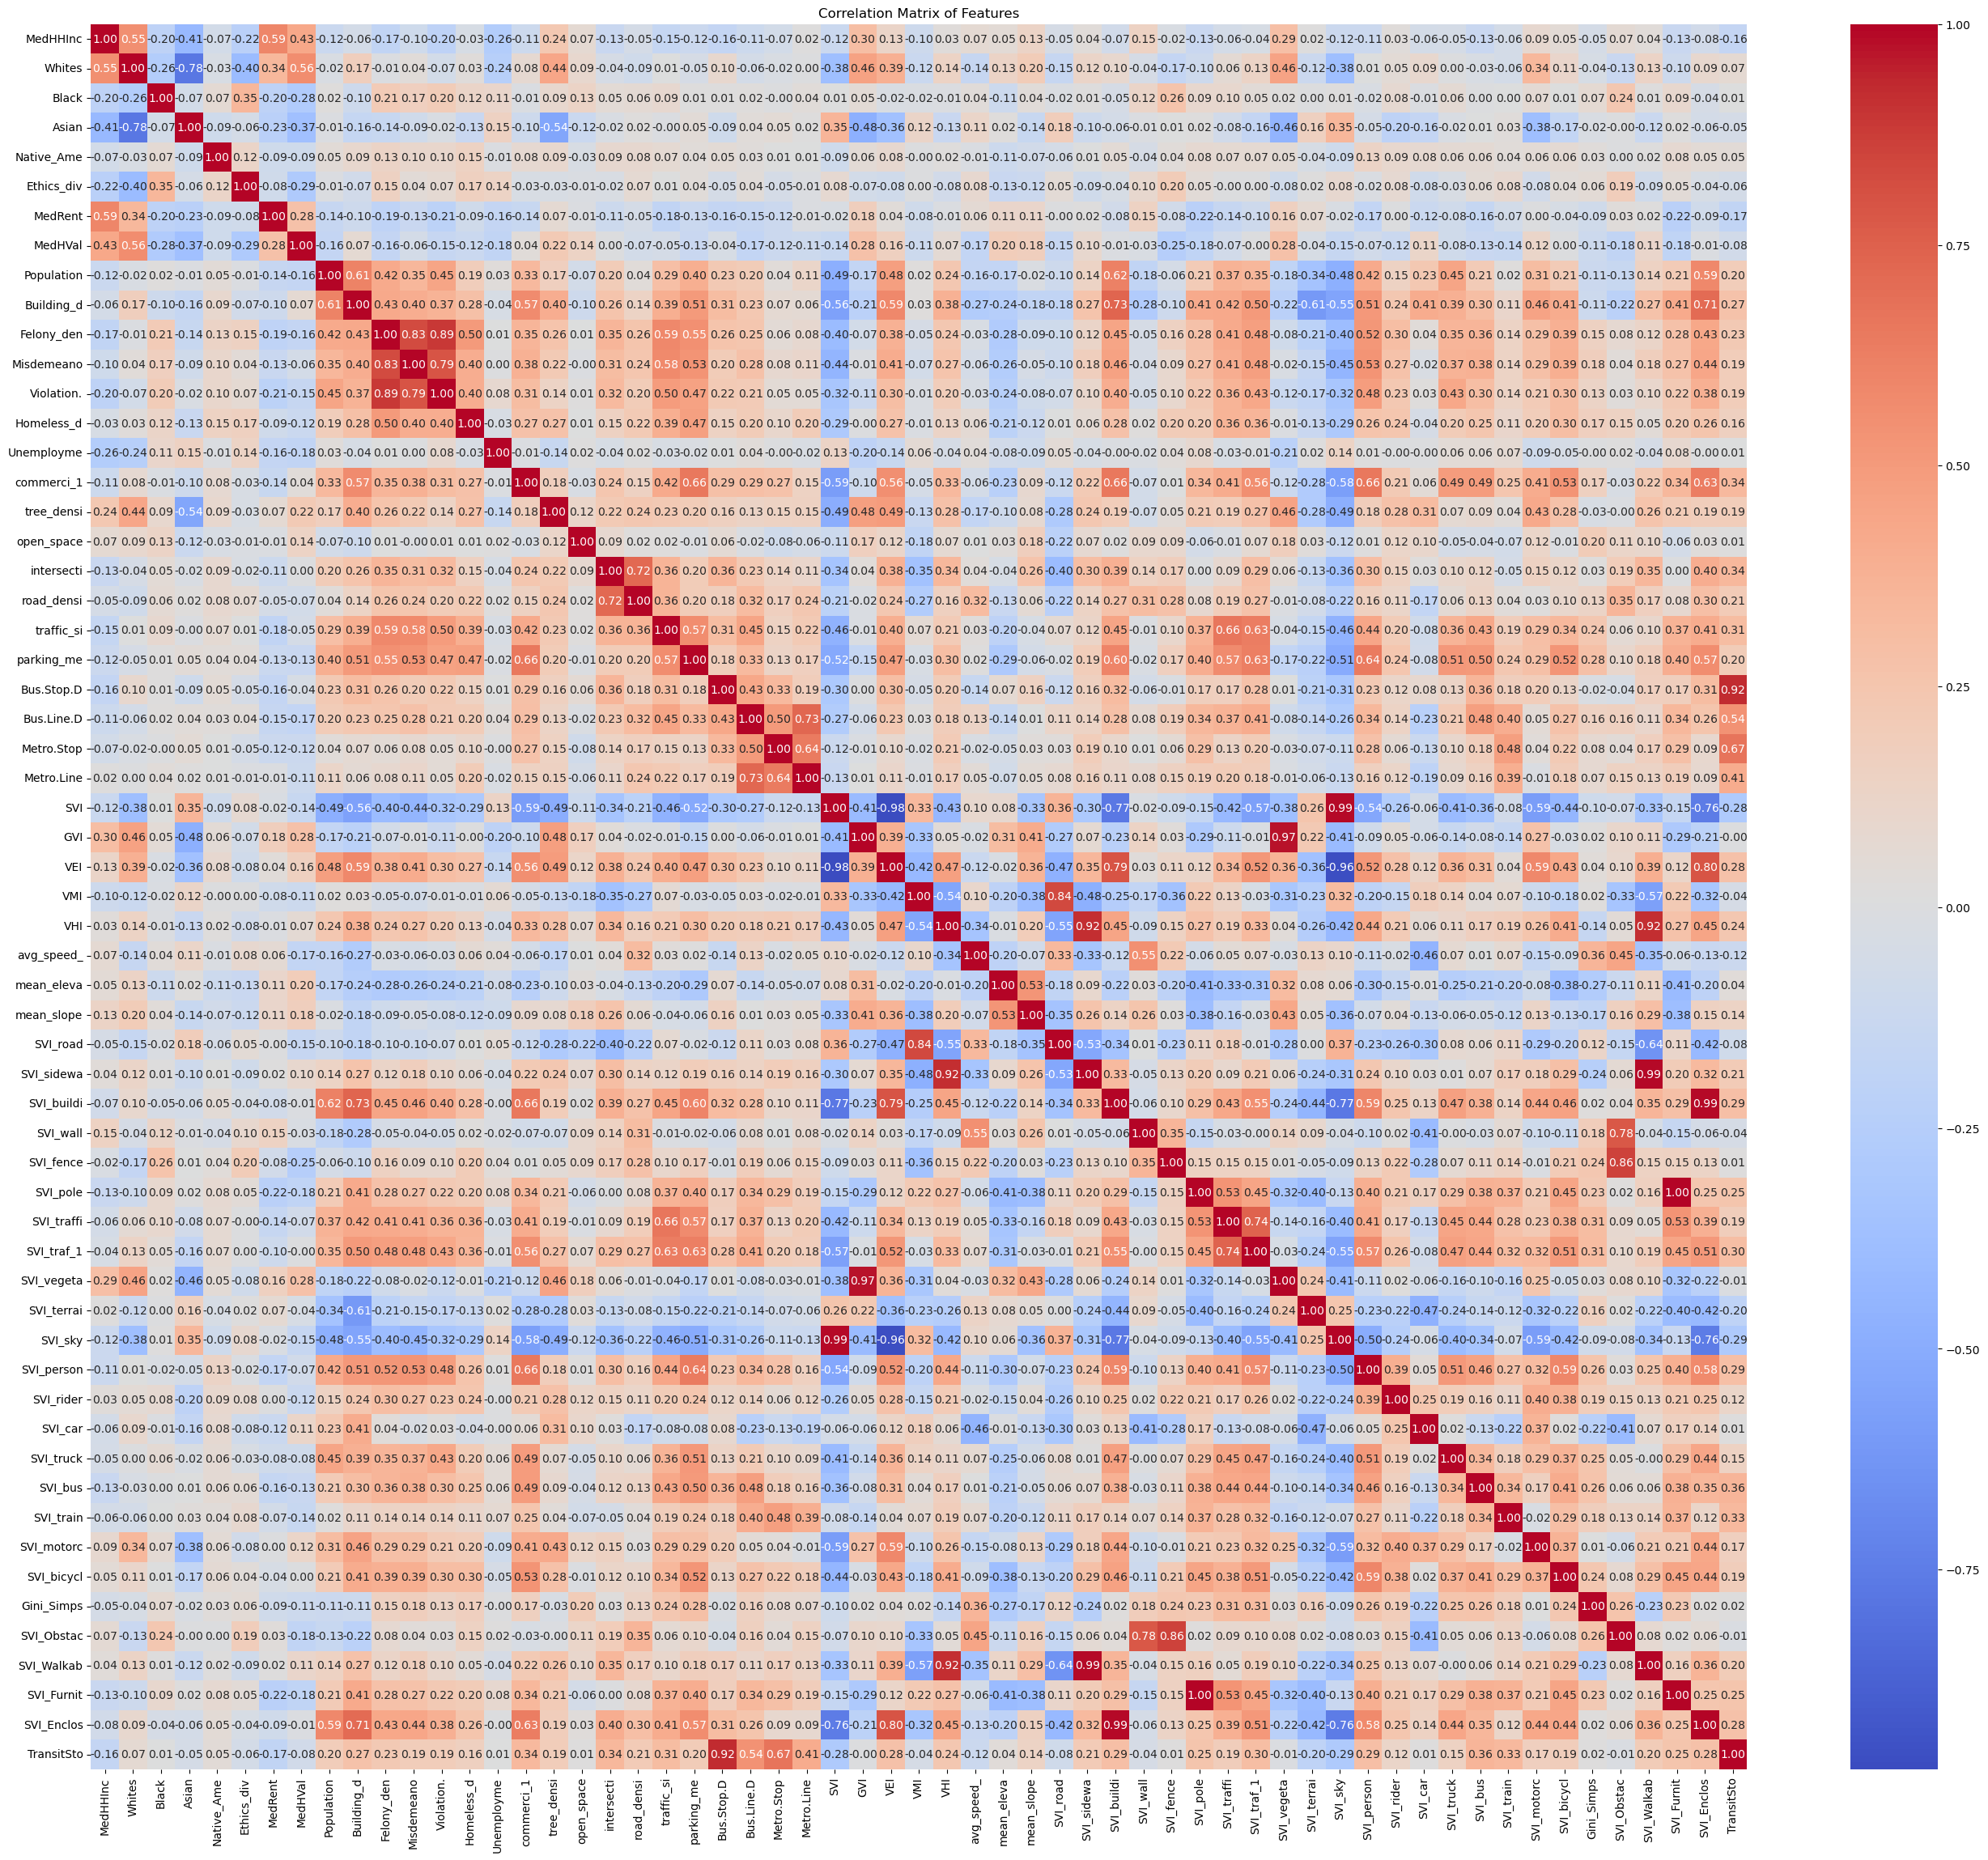

In [72]:
# Correlation Matrix
import seaborn as sns

# Assuming X is already defined as in your provided code
# ... (your existing code to define X) ...

# Generate the correlation matrix
correlation_matrix = X.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(33, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


### Variables_to_remove

Mark # variables you want to keep


In [73]:

variables_to_remove = [

    # --------- Demo ---------
    # 'Population',
    # 'Whites',
    # 'Black',
    # 'Asian',
    'Native_Ame',
    # 'Ethics_div',
    # 'MedHHInc',
    'MedRent',
    'MedHVal',

    # 'Felony_den',
    'Misdemeano',
    'Violation.',
    # 'Homeless_d',
    'Unemployme',

    # --------- 5D Density ---------
    # 'Building_d',
    # 'intersecti',

    # --------- 5D Diversity ---------
    # 'Gini_Simps',
    'Public',
    'Commercial',
    'Industrial',
    'Residentia',
    'Mixed.Use',
    # 'commerci_1',

    # --------- 5D Design ---------
    'tree_densi',
    # 'open_space',
    'road_densi',
    'traffic_si',
    # 'parking_me',
    # 'mean_eleva',
    # 'mean_slope',
    # 'avg_speed_',

    # --------- 5D Transit + Accessibility---------
    'Bus.Stop.D',
    'Bus.Line.D',
    'Metro.Stop',
    'Metro.Line',
    # 'TransitSto',

    # --------- SVI ---------
    # 'SVI_Obstac',
    # 'SVI_Furnit',
    # 'SVI_Enclos'
    # 'SVI_vegeta',
    # 'SVI_person',
    # 'SVI_Walkab',

    'SVI_sidewa',
    'SVI',
    'GVI',
    'VEI',
    # 'VMI',
    'VHI',
    'SVI_road',
    'SVI_buildi',
    'SVI_wall',
    'SVI_fence',
    'SVI_pole',
    'SVI_traffi',
    'SVI_traf_1',
    'SVI_terrai',
    'SVI_sky',
    'SVI_person',
    'SVI_rider',
    'SVI_car',
    'SVI_truck',
    'SVI_bus',
    'SVI_train',
    'SVI_motorc',
    'SVI_bicycl',

]

In [74]:
#  Delete high VIF columns
df_cleaned1 = df_cleaned.drop(columns=variables_to_remove)

df_cleaned=df_cleaned1
# Separate X and Y
X = df_cleaned.drop(columns=['crash_den', 'geometry', 'crash_coun','Area_km2', 'geoid'])
X = X.apply(pd.to_numeric, errors='coerce')  # Forced to a numeric type, illegal values ​​become NaN

# Instead of dropping all columns with ANY NaNs, drop only rows with NaNs:
X = X.dropna(axis=0, how='any')  # Remove rows that still have NaN

y_new = df_cleaned['crash_den'][X.index]  # Align y_new with X's index


In [ ]:
# 可视化high VIF columns

# vif_data_new = vif_data_new[vif_data_new["VIF"] > 15]
# vif_data_new

In [ ]:
# #  人工筛选需要保留的columns

# high_vif_columns=vif_data_new["Variable"].tolist()
# high_vif_columns = [col for col in high_vif_columns if col not in ['parking_me','SVI_sidewa','SVI_vegetation']]
# high_vif_columns

In [75]:
# Calculate VIF
pd.options.display.float_format = '{:.1f}'.format
vif_data_new = pd.DataFrame()
vif_data_new["Variable"] = X.columns
vif_data_new["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data_new)

      Variable  VIF
0     MedHHInc  1.9
1       Whites  7.6
2        Black  1.8
3        Asian  5.7
4   Ethics_div  2.2
5   Population  2.8
6   Building_d  4.2
7   Felony_den  2.1
8   Homeless_d  1.5
9   commerci_1  2.8
10  open_space  1.1
11  intersecti  1.7
12  parking_me  3.1
13         VMI  2.5
14  avg_speed_  1.8
15  mean_eleva  2.0
16  mean_slope  2.5
17  SVI_vegeta  2.1
18  Gini_Simps  1.6
19  SVI_Obstac  1.9
20  SVI_Walkab  2.2
21  SVI_Furnit  2.1
22  SVI_Enclos  6.1
23  TransitSto  1.4


In [76]:
vif_data_new

Variable  VIF
0     MedHHInc  1.9
1       Whites  7.6
2        Black  1.8
3        Asian  5.7
4   Ethics_div  2.2
5   Population  2.8
6   Building_d  4.2
7   Felony_den  2.1
8   Homeless_d  1.5
9   commerci_1  2.8
10  open_space  1.1
11  intersecti  1.7
12  parking_me  3.1
13         VMI  2.5
14  avg_speed_  1.8
15  mean_eleva  2.0
16  mean_slope  2.5
17  SVI_vegeta  2.1
18  Gini_Simps  1.6
19  SVI_Obstac  1.9
20  SVI_Walkab  2.2
21  SVI_Furnit  2.1
22  SVI_Enclos  6.1
23  TransitSto  1.4

In [77]:
#  对原数据集 - 删除 high VIF columns
df_cleaned = gdf_tracts.drop(columns=variables_to_remove)
df_cleaned.describe().T

count     mean     std     min      25%      50%      75%      max
crash_coun  676.0      1.3     1.5     1.0      1.0      1.0      1.0     22.0
Area_km2    676.0      0.2     0.4     0.0      0.1      0.1      0.2      4.9
MedHHInc    620.0 150413.6 61399.4 12169.0 109297.5 149985.0 194127.2 250001.0
Whites      675.0     43.8    21.5     0.0     27.7     43.2     60.3     98.2
Black       675.0      4.8     8.0     0.0      0.0      1.7      5.7     60.1
Asian       675.0     34.0    21.3     0.0     15.8     29.6     49.1    100.0
Ethics_div  675.0      0.6     0.1     0.0      0.5      0.6      0.7      0.9
Population  676.0  13543.8 12361.7     0.0   7036.9  10403.0  15164.3 111074.8
Building_d  674.0      0.4     0.1     0.0      0.3      0.4      0.4      0.7
Felony_den  676.0    650.6  1358.8     0.9    129.2    286.4    638.2  19981.7
Homeless_d  676.0    479.9  1205.7     0.4     24.3     87.8    354.9  12327.2
commerci_1  676.0   4978.4  6126.9     0.0   1409.3   2933.0   6620.7  75267.7
open_space  676.0      6.7    16.3     0.0      0.0      0.0      4.2    169.9
intersecti  676.0    507.1   317.8     0.0    306.0    441.2    639.3   2353.3
parking_me  676.0   1723.5  2794.0     0.0      0.0    177.0   2491.0  22610.6
VMI         676.0      0.4     0.0     0.3      0.4      0.4      0.4      0.5
avg_speed_  676.0     21.3    10.4    15.0     16.1     18.0     20.1     71.7
mean_eleva  676.0     57.3    39.3    -0.0     27.2     51.5     78.8    230.0
mean_slope  676.0      5.9     3.3     1.6      3.3      5.1      7.6     26.1
SVI_vegeta  676.0      0.1     0.0     0.0      0.0      0.1      0.1      0.2
Gini_Simps  676.0      0.3     0.2     0.0      0.1      0.3      0.5      0.7
SVI_Obstac  676.0      0.0     0.0     0.0      0.0      0.0      0.0      0.0
SVI_Walkab  676.0      0.1     0.0     0.0      0.0      0.1      0.1      0.1
SVI_Furnit  676.0      0.0     0.0     0.0      0.0      0.0      0.0      0.0
SVI_Enclos  676.0      0.3     0.2     0.0      0.2      0.2      0.3      1.3
TransitSto  676.0    120.6   113.8     0.0     48.3     85.0    164.6    856.4
crash_den   676.0     16.7    57.7     0.2      6.3      9.1     15.3   1455.3

### Save Shapefile / After VIF

In [78]:
# Save the GeoDataFrame to a shapefile

output_shapefile_path = './Data/ GVI CBG Final 250430.shp'
try:
    df_cleaned.to_file(output_shapefile_path)
    print(f"GeoDataFrame saved to: {output_shapefile_path}")
except Exception as e:
    print(f"An error occurred while saving the shapefile: {e}")

GeoDataFrame saved to: ./Data/ GVI CBG Final 250430.shp


# 5 - Model

### Load Shapefile / After VIF

In [79]:
gdf_tracts = gpd.read_file('./Data/ GVI CBG Final 250430.shp')
print(gdf_tracts.shape)
print(gdf_tracts.columns)

df_cleaned=gdf_tracts
# df_cleaned.head()

(676, 29)
Index(['geoid', 'crash_coun', 'Area_km2', 'MedHHInc', 'Whites', 'Black',
       'Asian', 'Ethics_div', 'Population', 'Building_d', 'Felony_den',
       'Homeless_d', 'commerci_1', 'open_space', 'intersecti', 'parking_me',
       'VMI', 'avg_speed_', 'mean_eleva', 'mean_slope', 'SVI_vegeta',
       'Gini_Simps', 'SVI_Obstac', 'SVI_Walkab', 'SVI_Furnit', 'SVI_Enclos',
       'TransitSto', 'crash_den', 'geometry'],
      dtype='object')


In [80]:
pd.options.display.float_format = '{:.4f}'.format
df_cleaned.describe().T

count        mean        std        min         25%         50%  \
crash_coun 676.0000      1.3092     1.4998     1.0000      1.0000      1.0000   
Area_km2   676.0000      0.1755     0.3563     0.0007      0.0746      0.1174   
MedHHInc   620.0000 150413.6274 61399.4068 12169.0000 109297.5000 149985.0000   
Whites     675.0000     43.7559    21.5279     0.0000     27.7086     43.1877   
Black      675.0000      4.7649     8.0432     0.0000      0.0000      1.6884   
Asian      675.0000     33.9921    21.3277     0.0000     15.7964     29.5735   
Ethics_div 675.0000      0.5772     0.1381     0.0000      0.4981      0.5936   
Population 676.0000  13543.7982 12361.6683     0.0000   7036.9297  10402.9904   
Building_d 674.0000      0.3597     0.1091     0.0146      0.2985      0.3581   
Felony_den 676.0000    650.6372  1358.7998     0.8569    129.1879    286.3965   
Homeless_d 676.0000    479.9015  1205.6580     0.4284     24.3016     87.8144   
commerci_1 676.0000   4978.3824  6126.9465     0.0000   1409.2919   2933.0443   
open_space 676.0000      6.7496    16.2824     0.0000      0.0000      0.0000   
intersecti 676.0000    507.0996   317.7923     0.0000    306.0442    441.2458   
parking_me 676.0000   1723.4671  2794.0202     0.0000      0.0000    177.0265   
VMI        676.0000      0.4262     0.0144     0.3218      0.4171      0.4290   
avg_speed_ 676.0000     21.3236    10.4364    15.0000     16.0955     18.0198   
mean_eleva 676.0000     57.3088    39.2553    -0.0208     27.2477     51.5101   
mean_slope 676.0000      5.9028     3.3147     1.5567      3.3119      5.1131   
SVI_vegeta 676.0000      0.0676     0.0359     0.0012      0.0406      0.0628   
Gini_Simps 676.0000      0.2853     0.1999     0.0000      0.1006      0.2927   
SVI_Obstac 676.0000      0.0044     0.0035     0.0002      0.0019      0.0035   
SVI_Walkab 676.0000      0.0548     0.0127     0.0268      0.0464      0.0536   
SVI_Furnit 676.0000      0.0039     0.0012     0.0010      0.0031      0.0039   
SVI_Enclos 676.0000      0.2770     0.1552     0.0136      0.1753      0.2301   
TransitSto 676.0000    120.6111   113.7594     0.0000     48.2743     84.9727   
crash_den  676.0000     16.6772    57.7236     0.2032      6.2611      9.1219   

                   75%         max  
crash_coun      1.0000     22.0000  
Area_km2        0.1680      4.9213  
MedHHInc   194127.2500 250001.0000  
Whites         60.3385     98.2036  
Black           5.7162     60.1467  
Asian          49.1124    100.0000  
Ethics_div      0.6727      0.8911  
Population  15164.3330 111074.8323  
Building_d      0.4326      0.6523  
Felony_den    638.1688  19981.7159  
Homeless_d    354.8720  12327.1773  
commerci_1   6620.6761  75267.7215  
open_space      4.1522    169.9285  
intersecti    639.2880   2353.3367  
parking_me   2491.0379  22610.5556  
VMI             0.4365      0.4917  
avg_speed_     20.0871     71.6984  
mean_eleva     78.8374    229.9971  
mean_slope      7.5641     26.0718  
SVI_vegeta      0.0882      0.2381  
Gini_Simps      0.4577      0.7294  
SVI_Obstac      0.0057      0.0274  
SVI_Walkab      0.0621      0.1210  
SVI_Furnit      0.0046      0.0079  
SVI_Enclos      0.3326      1.2933  
TransitSto    164.5891    856.4156  
crash_den      15.2642   1455.2524

### Random Forest

####  Standardization


Shape of X after NaN handling: (619, 24)
Shape of y_log after NaN handling: (619,)

Shape of X_train before scaling: (495, 24)
Shape of X_test before scaling: (124, 24)

Standardization applied successfully.
Shape of X_train_scaled: (495, 24)
Shape of X_test_scaled: (124, 24)

Random Forest model trained on standardized data.

Random Forest Performance (Standardized Data):
R-squared: 0.7398888821032588
Mean Squared Error: 0.15119354366947618
Mean Absolute Error: 0.2709619620879351


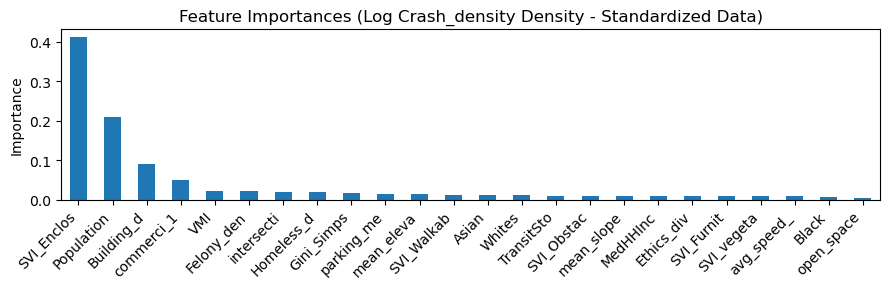

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assume df_cleaned is your DataFrame loaded previously
# df_cleaned = pd.read_csv(...) # Or however you load your data

# --- 1. Define Features (X) and Target (y) ---
# Select feature columns BEFORE any scaling or splitting
feature_cols_to_drop = ['crash_den', 'geometry',  'crash_coun','Area_km2', 'geoid']
# Ensure target column 'TripStart_' is not in the drop list
# (It's the target, so it's handled separately)

all_cols = df_cleaned.columns
potential_feature_cols = [col for col in all_cols if col not in feature_cols_to_drop and col != 'crash_den']

# Create X from potential feature columns, converting to numeric robustly
# It's generally better to ensure numeric conversion happened earlier
# or select only known numeric columns here.
X = df_cleaned[potential_feature_cols].apply(pd.to_numeric, errors='coerce')

# Define target variable y and apply log transform
if 'crash_den' in df_cleaned.columns:
    y_numeric = pd.to_numeric(df_cleaned['crash_den'], errors='coerce')
    y_log = np.log1p(y_numeric) # log(1 + y)
else:
    raise ValueError("Target column 'crash_den' not found in DataFrame.")

# --- 2. Handle Missing Values (NaNs) ---
# Drop rows with NaNs in features (X) or target (y_log) BEFORE splitting
combined = pd.concat([X, y_log], axis=1).dropna(axis=0, how='any')
X = combined[X.columns]
y_log = combined[y_log.name] # Retrieve the aligned target Series

print(f"Shape of X after NaN handling: {X.shape}")
print(f"Shape of y_log after NaN handling: {y_log.shape}")
if X.empty or y_log.empty:
     raise ValueError("No data remaining after handling NaNs. Check data quality or NaN handling strategy.")


# --- 3. Split Data into Training and Testing sets ---
# Split the *original* (unscaled) data
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

print(f"\nShape of X_train before scaling: {X_train.shape}")
print(f"Shape of X_test before scaling: {X_test.shape}")

# --- 4. Standardize Features ---
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data features
# The scaler learns the mean and std dev from X_train
scaler.fit(X_train)

# Transform both the training and testing data features
# using the *same* fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: Convert scaled arrays back to DataFrames to keep column names
# This is useful for feature importance plotting later
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

print("\nStandardization applied successfully.")
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")


# --- 5. Train Random Forest Model ---
# Initialize the model
rf_log = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the SCALED training data
rf_log.fit(X_train_scaled, y_train)
print("\nRandom Forest model trained on standardized data.")

# --- 6. Predict on Scaled Test Data ---
y_pred_log = rf_log.predict(X_test_scaled)

# --- 7. Evaluate the Model ---
r2 = r2_score(y_test, y_pred_log)
mse = mean_squared_error(y_test, y_pred_log)
mae = mean_absolute_error(y_test, y_pred_log)

print("\nRandom Forest Performance (Standardized Data):")
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# --- 8. Feature Importances ---
# Get importances from the trained model
# The index should match the columns of the data used for training (X_train_scaled)
importances_log = pd.Series(rf_log.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(9, 3)) # Adjusted size
importances_log.plot(kind='bar', title='Feature Importances (Log Crash_density Density - Standardized Data)')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right') # Rotate labels
plt.tight_layout()
plt.show()


In [82]:
# Create a DataFrame from the feature importances
importances_df = pd.DataFrame({'Feature': importances_log.index, 'Importance': importances_log.values})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# importances_df


#### Non Standardization


Random Forest Performance:
R-squared: 0.7404552126420517
Mean Squared Error: 0.15086435542969345
Mean Absolute Error: 0.2706661600030188


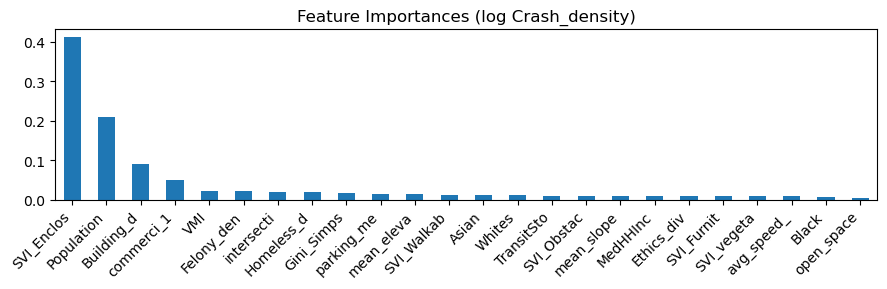

In [83]:
# Random Forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


# Define X and log-transformed y
# Instead of dropping columns with ANY NaNs after conversion, drop only ROWS with NaNs
X = df_cleaned.drop(columns=['crash_den', 'geometry', 'crash_coun','Area_km2', 'geoid'])
X = X.apply(pd.to_numeric, errors='coerce')
# Drop rows with NaNs, keeping columns with valid data
X = X.dropna(axis=0, how='any')  # axis=0 for rows, how='any' for any NaN in row
# Re-align y_log with X after dropping rows
y_log = np.log1p(df_cleaned.loc[X.index, 'crash_den'])  # log(1 + y), using X.index


X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)
rf_log = RandomForestRegressor(n_estimators=100, random_state=42)
rf_log.fit(X_train, y_train)
y_pred_log = rf_log.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred_log)
mse = mean_squared_error(y_test, y_pred_log)
mae = mean_absolute_error(y_test, y_pred_log)

print(f"Random Forest Performance:")
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")



# Feature importances
importances_log = pd.Series(rf_log.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(9, 3))
importances_log.plot(kind='bar', title='Feature Importances (log Crash_density)')
plt.xticks(rotation=45, ha='right') # Rotate labels
plt.tight_layout()
plt.show()

In [98]:
# Export the predictions to a CSV file

# 1. Preparing X and y_log
X_all = df_cleaned.drop(columns=['crash_den', 'geometry', 'crash_coun','Area_km2', 'geoid'])
X_all = X_all.apply(pd.to_numeric, errors='coerce')
X_all = X_all.dropna(axis=0, how='any')
y_all_log = np.log1p(df_cleaned.loc[X_all.index, 'crash_den'])  # 전체 y에 log(1 + y)

# 2. Training the Random Forest model on the entire dataset
rf_full = RandomForestRegressor(n_estimators=100, random_state=42)
rf_full.fit(X_all, y_all_log)

# 3. Predicting on the entire dataset
y_all_pred_log = rf_full.predict(X_all)
y_all_pred = np.expm1(y_all_pred_log)  # 역변환

# 4. Creating result DataFrame
df_predictions = pd.DataFrame({
    'geoid': df_cleaned.loc[X_all.index, 'geoid'],
    'crash_den_actual': df_cleaned.loc[X_all.index, 'crash_den'],
    'crash_den_predicted': y_all_pred
}, index=X_all.index)

# 5. df_cleaned left join df_predictions
df_final = df_cleaned.merge(df_predictions, on='geoid', how='left')

# 6. Save to CSV
#df_final.to_csv("./Data/df_cleaned_with_full_predictions.csv", index=False)

In [99]:
# Scenario 1: 10% increase Gini Simpson in all block groups
df_final['Gini_Simps'] = df_final['Gini_Simps'] * 1.1

# 1. Preparing X and y_log
X_all = df_final.drop(columns=['crash_den', 'geometry', 'crash_coun','Area_km2', 'geoid', 'crash_den_actual', 'crash_den_predicted'])
X_all = X_all.apply(pd.to_numeric, errors='coerce')
X_all = X_all.dropna(axis=0, how='any')

# 3. Predicting on the entire dataset
y_all_pred_log = rf_full.predict(X_all)
y_all_pred = np.expm1(y_all_pred_log)  # 역변환

# 4. Creating result DataFrame
df_predictions = pd.DataFrame({
    'geoid': df_final.loc[X_all.index, 'geoid'],
    #'crash_den_actual': df_final.loc[X_all.index, 'crash_den'],
    'crash_den_predicted_Sci1': y_all_pred
}, index=X_all.index)

# 5. df_cleaned left join df_predictions
df_final_Sci1 = df_final.merge(df_predictions, on='geoid', how='left')

In [101]:
# Scenario 2: 10% decrease SVI walkab in all block groups
df_final_Sci1['Gini_Simps'] = df_final_Sci1['Gini_Simps'] / 1.1
df_final_Sci1['SVI_Walkab'] = df_final_Sci1['SVI_Walkab'] * 0.9

# 1. Preparing X and y_log
X_all = df_final_Sci1.drop(columns=['crash_den', 'geometry', 'crash_coun','Area_km2', 'geoid', 'crash_den_actual', 'crash_den_predicted', 'crash_den_predicted_Sci1'])
X_all = X_all.apply(pd.to_numeric, errors='coerce')
X_all = X_all.dropna(axis=0, how='any')

# 3. Predicting on the entire dataset
y_all_pred_log = rf_full.predict(X_all)
y_all_pred = np.expm1(y_all_pred_log)  # 역변환

# 4. Creating result DataFrame
df_predictions = pd.DataFrame({
    'geoid': df_final_Sci1.loc[X_all.index, 'geoid'],
   # 'crash_den_actual': df_final_Sci1.loc[X_all.index, 'crash_den'],
    'crash_den_predicted_Sci2': y_all_pred
}, index=X_all.index)

# 5. df_cleaned left join df_predictions
df_final_Sci2 = df_final_Sci1.merge(df_predictions, on='geoid', how='left')

# Scenario 3: 10% decrease SVI_Obstacles in all block groups
df_final_Sci2['SVI_Walkab'] = df_final_Sci2['SVI_Walkab'] / 0.9
df_final_Sci2['SVI_Furnit'] = df_final_Sci2['SVI_Furnit'] * 1.1

# 1. Preparing X and y_log
X_all = df_final_Sci2.drop(columns=['crash_den', 'geometry', 'crash_coun','Area_km2', 'geoid', 'crash_den_actual', 'crash_den_predicted', 'crash_den_predicted_Sci1', 'crash_den_predicted_Sci2'])
X_all = X_all.apply(pd.to_numeric, errors='coerce')
X_all = X_all.dropna(axis=0, how='any')

# 3. Predicting on the entire dataset
y_all_pred_log = rf_full.predict(X_all)
y_all_pred = np.expm1(y_all_pred_log)  # 역변환

# 4. Creating result DataFrame
df_predictions = pd.DataFrame({
    'geoid': df_final_Sci2.loc[X_all.index, 'geoid'],
   # 'crash_den_actual': df_final_Sci2.loc[X_all.index, 'crash_den'],
    'crash_den_predicted_Sci3': y_all_pred
}, index=X_all.index)

# 5. df_cleaned left join df_predictions
df_final_Sci3 = df_final_Sci2.merge(df_predictions, on='geoid', how='left')

In [102]:
df_final_Sci3.columns

Index(['geoid', 'crash_coun', 'Area_km2', 'MedHHInc', 'Whites', 'Black',
       'Asian', 'Ethics_div', 'Population', 'Building_d', 'Felony_den',
       'Homeless_d', 'commerci_1', 'open_space', 'intersecti', 'parking_me',
       'VMI', 'avg_speed_', 'mean_eleva', 'mean_slope', 'SVI_vegeta',
       'Gini_Simps', 'SVI_Obstac', 'SVI_Walkab', 'SVI_Furnit', 'SVI_Enclos',
       'TransitSto', 'crash_den', 'geometry', 'crash_den_actual',
       'crash_den_predicted', 'crash_den_predicted_Sci1',
       'crash_den_predicted_Sci2', 'crash_den_predicted_Sci3'],
      dtype='object')

In [103]:
gdf = gpd.GeoDataFrame(df_final_Sci3, geometry='geometry', crs='EPSG:4326')
gdf.to_file("df_final_Sci3.geojson", driver="GeoJSON")

In [104]:
gdf.to_csv("df_final_Sci3.csv", index=False)

#### SHAP

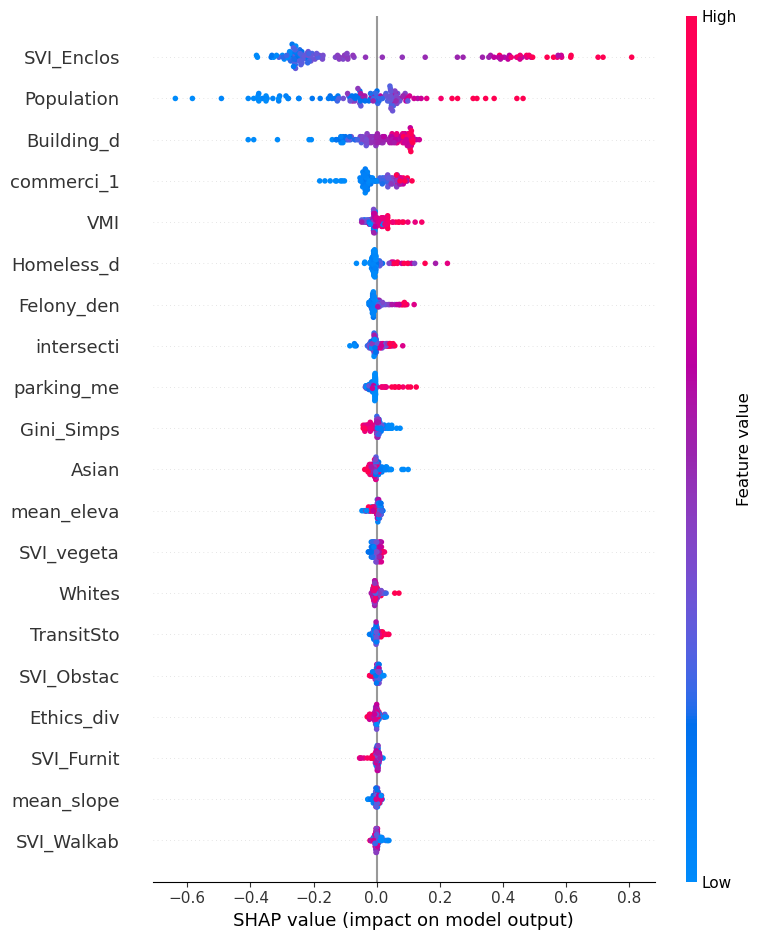

In [105]:
# Perform SHAP analysis and draw a graph

import shap

# Assuming rf_log and X_test are defined as in your provided code.

# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(rf_log)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

Renamed columns in X_test copy for plotting.

Calculating SHAP values...
SHAP values calculated.

Generating SHAP summary plot...


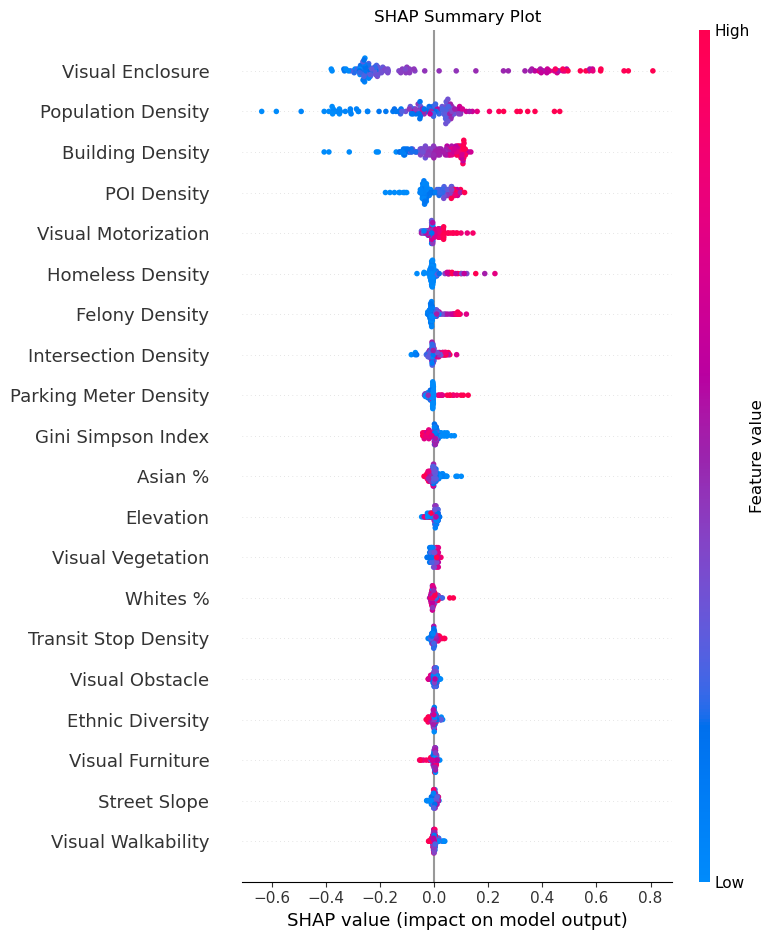

Summary plot generated.


In [106]:
# --- Define Feature Name Mapping (Reordered based on image_79e14a.png) ---
feature_name_mapping = {

    # Built Environment - Density & Diversity
    'Building_d': 'Building Density',
    'commerci_1': 'POI Density',
    'parking_me': 'Parking Meter Density',
    'Gini_Simps': 'Gini Simpson Index',
    'intersecti': 'Intersection Density',
    'open_space': 'Open Space', # Assuming 'Open Space Density' maps to 'open_space'
    # Built Environment - Design & Physical
    'mean_eleva': 'Elevation',
    'mean_slope': 'Street Slope',
    'avg_speed_': 'Avg. Speed Limit',
    # Transit
    'TransitSto': 'Transit Stop Density', # Assuming this maps correctly
    # Visual Metrics (SVI)
    'SVI_Enclos': 'Visual Enclosure',
    'SVI_Walkab': 'Visual Walkability', # Assuming SVI_Walkab exists
    'VMI': 'Visual Motorization',    # Assuming VMI exists
    'SVI_vegeta': 'Visual Vegetation',
    'SVI_Obstac': 'Visual Obstacle', # Note: Typo in image 'Obstacale' kept for consistency
    'SVI_Furnit': 'Visual Furniture',
    # Socio-Demographics
    'Population': 'Population Density',
    'Whites': 'Whites %',
    'Black': 'Black %',
    'Asian': 'Asian %',
    'Ethics_div': 'Ethnic Diversity',
    'MedHHInc': 'Median Household Income',
    'Felony_den': 'Felony Density',
    'Homeless_d': 'Homeless Density',
}

# --- Ensure X_test is a pandas DataFrame ---
if not isinstance(X_test, pd.DataFrame):
    # If X_test is numpy, try to convert it using known feature names
    # This assumes 'original_feature_names_from_data' was defined correctly earlier
    try:
        # Make sure original_feature_names_from_data is defined from previous context
        # If not, you might need to get it from rf_log.feature_names_in_ if available
        if 'original_feature_names_from_data' not in locals() and hasattr(rf_log, 'feature_names_in_'):
             original_feature_names_from_data = rf_log.feature_names_in_
        elif 'original_feature_names_from_data' not in locals():
             raise NameError("Original feature names needed to convert X_test to DataFrame.")

        if X_test.shape[1] == len(original_feature_names_from_data):
            X_test = pd.DataFrame(X_test, columns=original_feature_names_from_data)
            print("Converted X_test from NumPy array to DataFrame.")
        else:
            raise ValueError("Shape mismatch between X_test and feature names.")
    except Exception as e:
        print(f"Error: X_test must be a pandas DataFrame for renaming. Conversion failed: {e}")
        # Handle error appropriately, maybe exit
        # For now, we'll proceed but the plot names might be incorrect
        X_test_renamed = X_test # Use original X_test, plot names will be wrong

else:
    # --- Create a copy of X_test to rename columns ---
    X_test_renamed = X_test.copy()

    # --- Rename columns in the copy ---
    # Only rename columns that exist in both X_test and the mapping
    cols_to_rename = {
        orig_name: new_name
        for orig_name, new_name in feature_name_mapping.items()
        if orig_name in X_test_renamed.columns
    }
    X_test_renamed.rename(columns=cols_to_rename, inplace=True)
    print("Renamed columns in X_test copy for plotting.")
    # print("New column names:", X_test_renamed.columns.tolist()) # Optional: verify

# --- Calculate SHAP values ---
try:
    print("\nCalculating SHAP values...")
    explainer = shap.TreeExplainer(rf_log)
    # Use the original X_test for calculating SHAP values
    shap_values = explainer.shap_values(X_test)
    print("SHAP values calculated.")

    # --- Generate Summary Plot with Renamed Features ---
    print("\nGenerating SHAP summary plot...")
    plt.figure() # Optional: Create a figure context if needed
    shap.summary_plot(
        shap_values,
        features=X_test_renamed, # Use the DataFrame with RENAMED columns here
        feature_names=X_test_renamed.columns, # Explicitly pass renamed columns
        show=False # Prevent immediate display if further customization is needed
    )
    # Add title or other customizations if desired
    plt.title("SHAP Summary Plot")
    plt.tight_layout() # Adjust layout
    plt.show() # Display the plot
    print("Summary plot generated.")

except Exception as e:
    print(f"\nAn error occurred during SHAP calculation or plotting: {e}")
    import traceback
    traceback.print_exc()

#####  Dependence Plots each variable

Generating SHAP Dependence Plots (X-Numbered Labels & Filenames, Updated Visual Style, Dynamic Y-Axis)...

Processing feature (X1): 'Building_d' (Displaying as: 'Building Density')
  SHAP value range: 0.5426
  Setting Y-axis limits to [-0.5, 0.75]
  Success: Plot saved successfully to: SHAP/X1_Building_Density_shap_dependence_styled.jpg


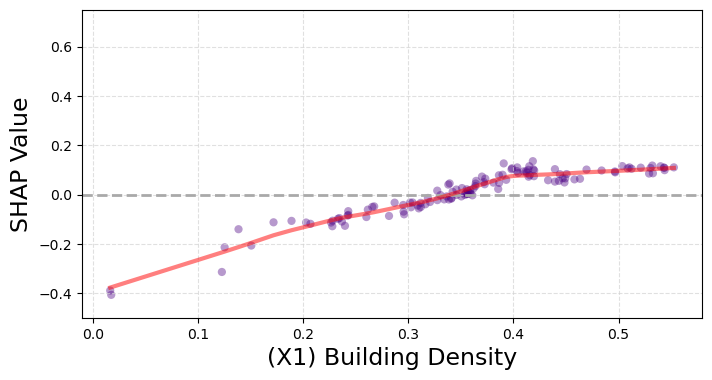


Processing feature (X2): 'commerci_1' (Displaying as: 'POI Density')
  SHAP value range: 0.2926
  Setting Y-axis limits to [-0.5, 0.75]
  Success: Plot saved successfully to: SHAP/X2_POI_Density_shap_dependence_styled.jpg


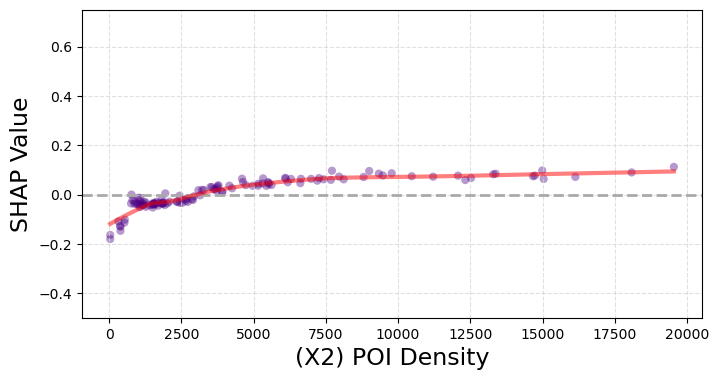


Processing feature (X3): 'parking_me' (Displaying as: 'Parking Meter Density')
  SHAP value range: 0.1614
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X3_Parking_Meter_Density_shap_dependence_styled.jpg


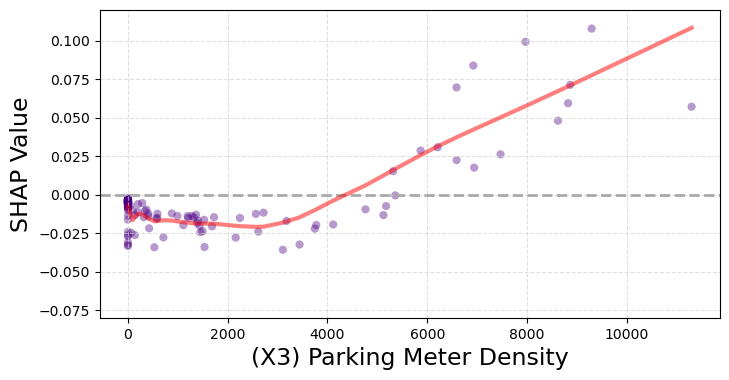


Processing feature (X4): 'Gini_Simps' (Displaying as: 'Gini Simpson Index')
  SHAP value range: 0.1170
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X4_Gini_Simpson_Index_shap_dependence_styled.jpg


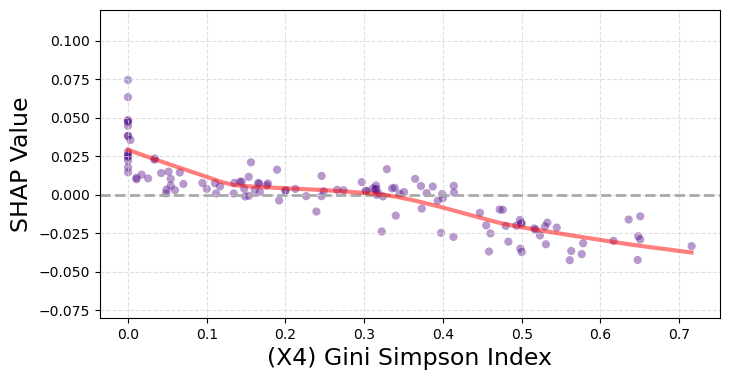


Processing feature (X5): 'intersecti' (Displaying as: 'Intersection Density')
  SHAP value range: 0.1677
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X5_Intersection_Density_shap_dependence_styled.jpg


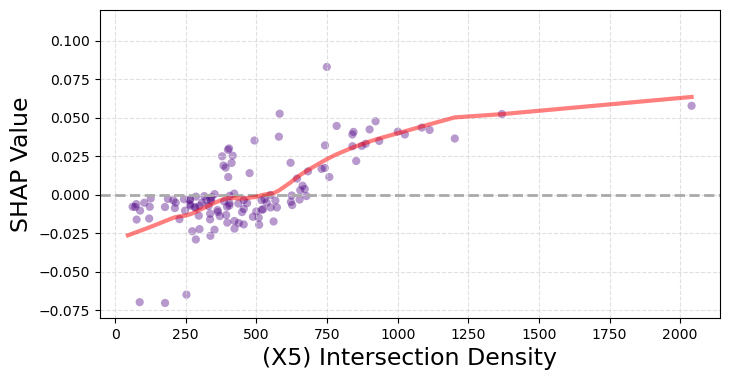


Processing feature (X6): 'open_space' (Displaying as: 'Open Space')
  SHAP value range: 0.0447
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X6_Open_Space_shap_dependence_styled.jpg


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


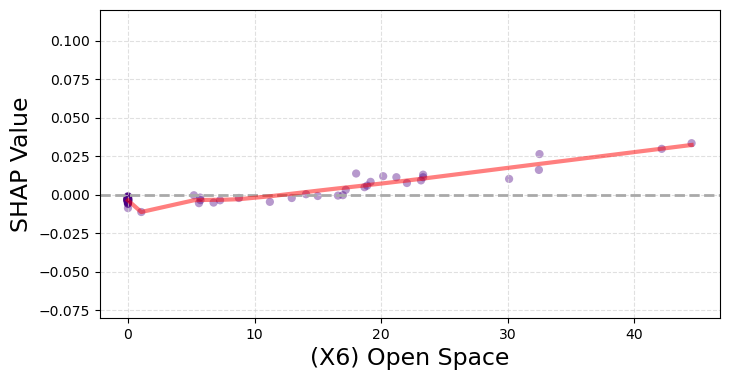


Processing feature (X7): 'mean_eleva' (Displaying as: 'Elevation')
  SHAP value range: 0.0662
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X7_Elevation_shap_dependence_styled.jpg


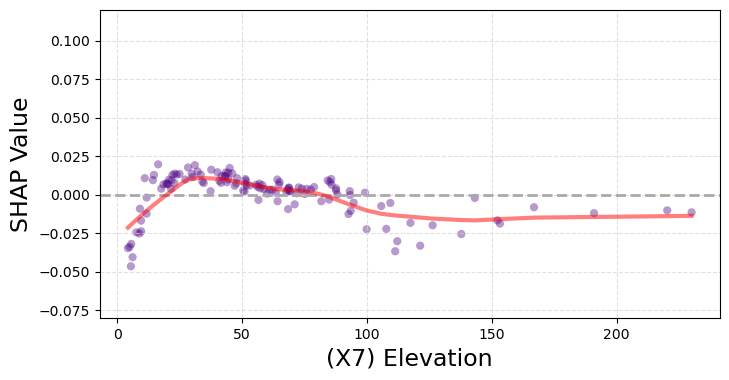


Processing feature (X8): 'mean_slope' (Displaying as: 'Street Slope')
  SHAP value range: 0.0457
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X8_Street_Slope_shap_dependence_styled.jpg


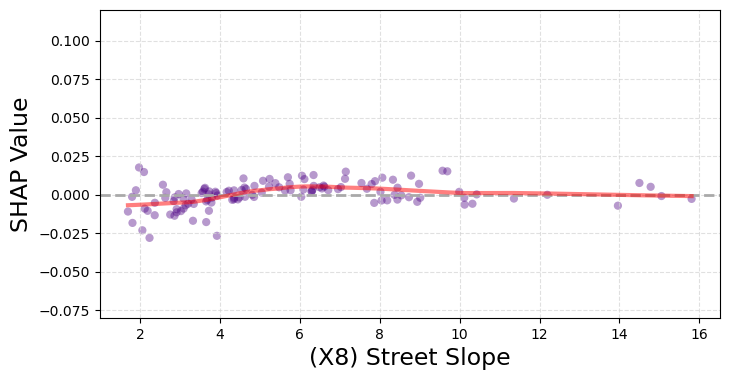


Processing feature (X9): 'avg_speed_' (Displaying as: 'Avg. Speed Limit')
  SHAP value range: 0.0536
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X9_Avg__Speed_Limit_shap_dependence_styled.jpg


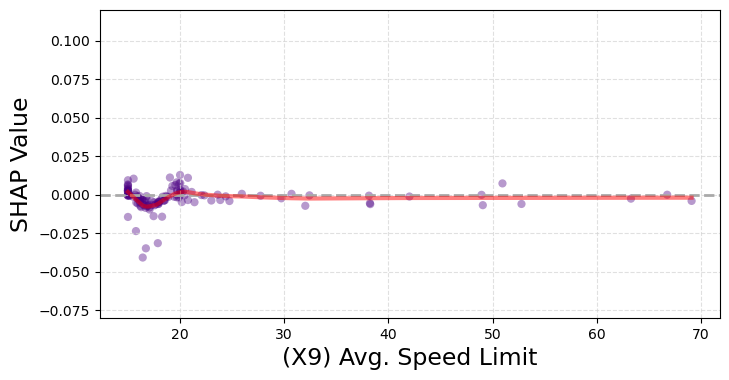


Processing feature (X10): 'TransitSto' (Displaying as: 'Transit Stop Density')
  SHAP value range: 0.0614
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X10_Transit_Stop_Density_shap_dependence_styled.jpg


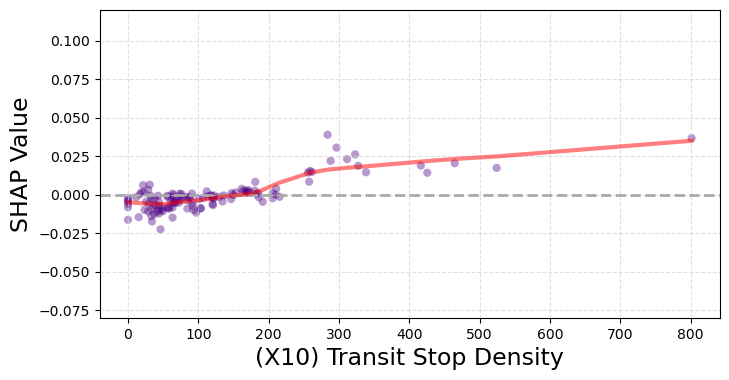


Processing feature (X11): 'SVI_Enclos' (Displaying as: 'Visual Enclosure')
  SHAP value range: 1.1896
  Setting Y-axis limits to [-0.5, 0.75]
  Success: Plot saved successfully to: SHAP/X11_Visual_Enclosure_shap_dependence_styled.jpg


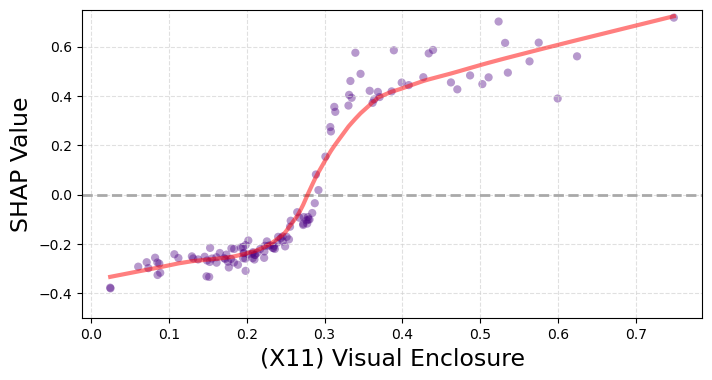


Processing feature (X12): 'SVI_Walkab' (Displaying as: 'Visual Walkability')
  SHAP value range: 0.0599
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X12_Visual_Walkability_shap_dependence_styled.jpg


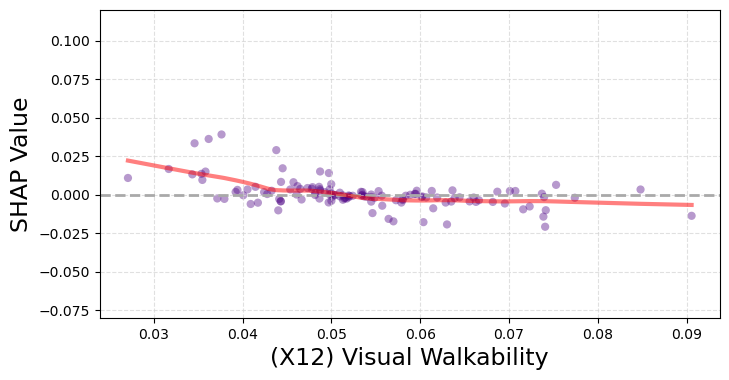


Processing feature (X13): 'VMI' (Displaying as: 'Visual Motorization')
  SHAP value range: 0.1906
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X13_Visual_Motorization_shap_dependence_styled.jpg


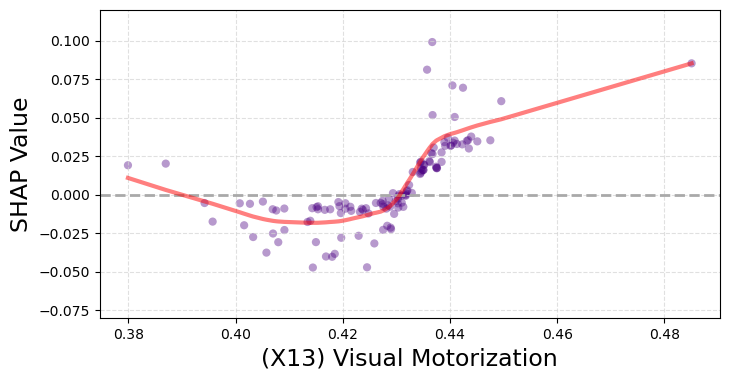


Processing feature (X14): 'SVI_vegeta' (Displaying as: 'Visual Vegetation')
  SHAP value range: 0.0512
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X14_Visual_Vegetation_shap_dependence_styled.jpg


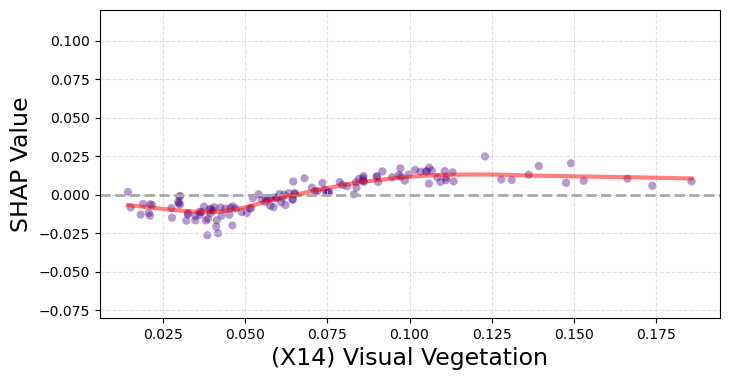


Processing feature (X15): 'SVI_Obstac' (Displaying as: 'Visual Obstacle')
  SHAP value range: 0.0454
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X15_Visual_Obstacle_shap_dependence_styled.jpg


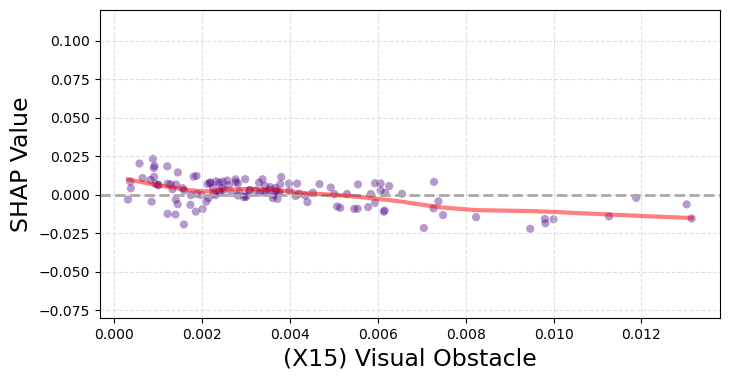


Processing feature (X16): 'SVI_Furnit' (Displaying as: 'Visual Furniture')
  SHAP value range: 0.0744
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X16_Visual_Furniture_shap_dependence_styled.jpg


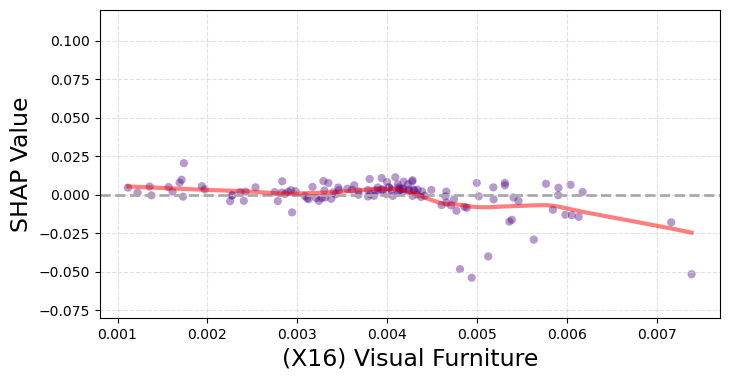


Processing feature (X17): 'Population' (Displaying as: 'Population Density')
  SHAP value range: 1.1025
  Setting Y-axis limits to [-0.5, 0.75]
  Success: Plot saved successfully to: SHAP/X17_Population_Density_shap_dependence_styled.jpg


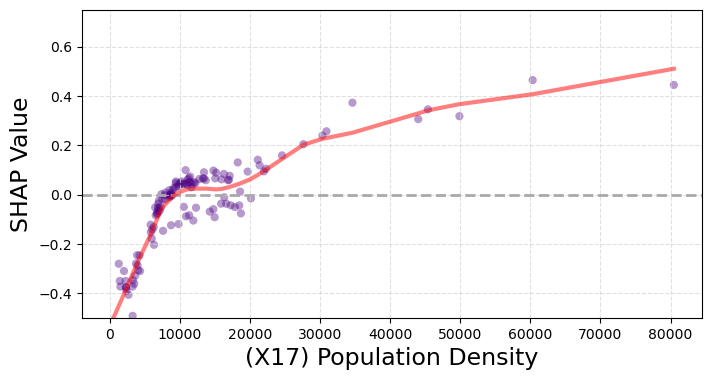


Processing feature (X18): 'Whites' (Displaying as: 'Whites %')
  SHAP value range: 0.0877
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X18_Whites___shap_dependence_styled.jpg


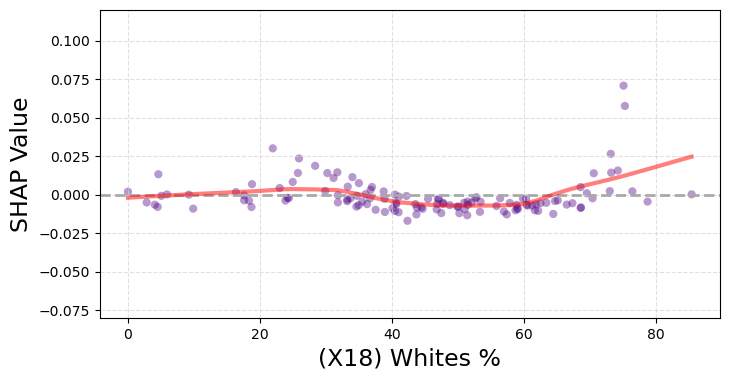


Processing feature (X19): 'Black' (Displaying as: 'Black %')
  SHAP value range: 0.0385
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X19_Black___shap_dependence_styled.jpg


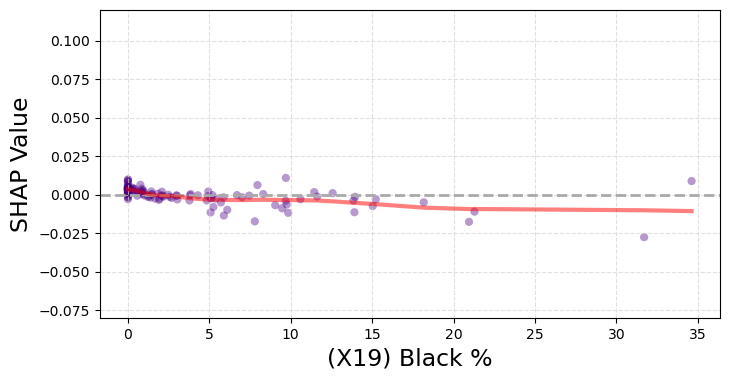


Processing feature (X20): 'Asian' (Displaying as: 'Asian %')
  SHAP value range: 0.1377
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X20_Asian___shap_dependence_styled.jpg


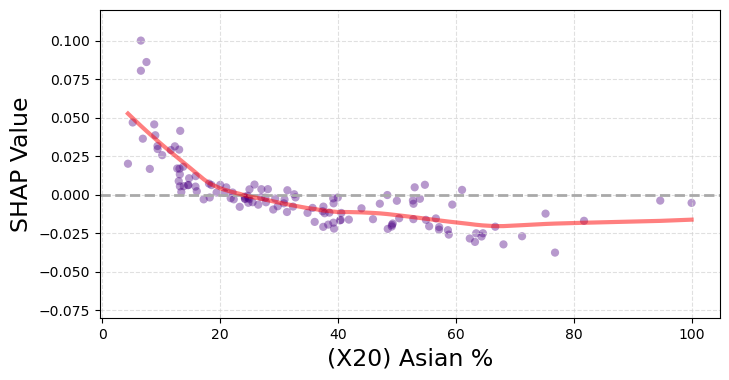


Processing feature (X21): 'Ethics_div' (Displaying as: 'Ethnic Diversity')
  SHAP value range: 0.0609
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X21_Ethnic_Diversity_shap_dependence_styled.jpg


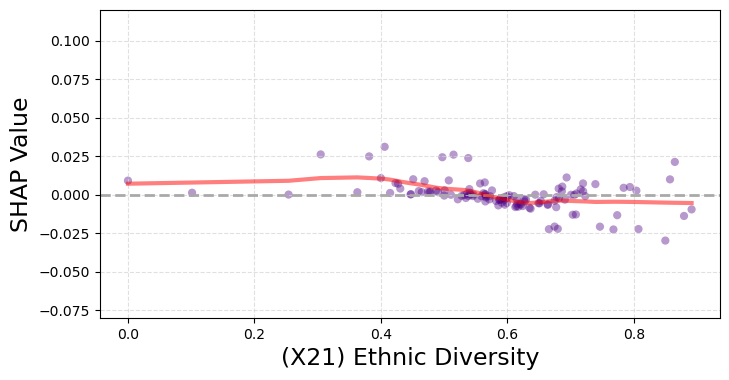


Processing feature (X22): 'MedHHInc' (Displaying as: 'Median Household Income')
  SHAP value range: 0.0580
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X22_Median_Household_Income_shap_dependence_styled.jpg


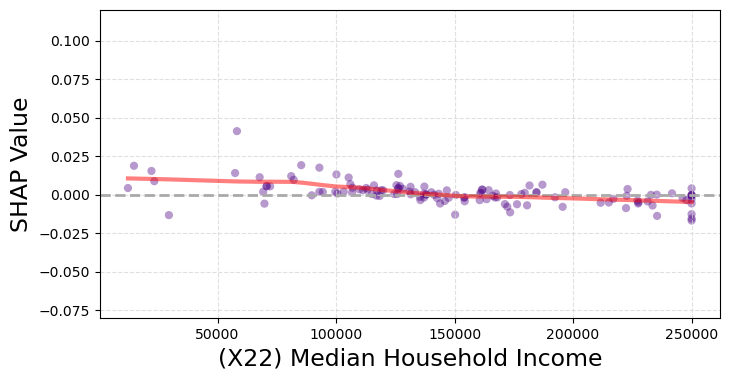


Processing feature (X23): 'Felony_den' (Displaying as: 'Felony Density')
  SHAP value range: 0.1435
  Setting Y-axis limits to [-0.08, 0.12]
  Success: Plot saved successfully to: SHAP/X23_Felony_Density_shap_dependence_styled.jpg


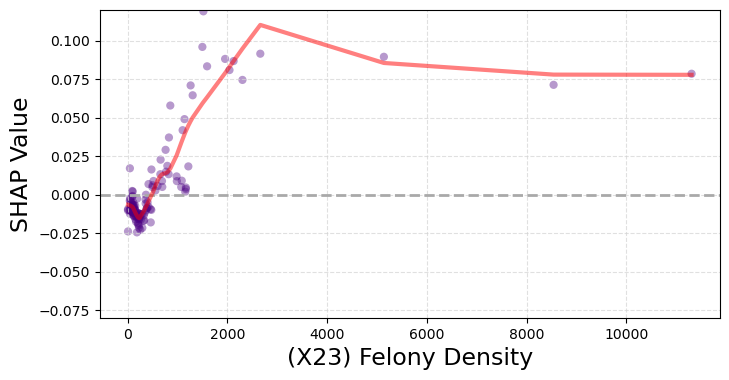


Processing feature (X24): 'Homeless_d' (Displaying as: 'Homeless Density')
  SHAP value range: 0.2885
  Setting Y-axis limits to [-0.5, 0.75]
  Success: Plot saved successfully to: SHAP/X24_Homeless_Density_shap_dependence_styled.jpg


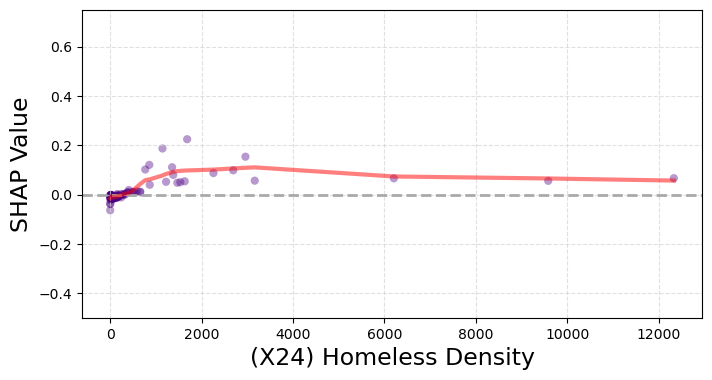


Finished generating all plots.


In [107]:
import statsmodels.api as sm # Used for lowess
import traceback # For detailed error printing (if needed)
import string # Keep for potential fallback, though not primary use now

# --- Assume necessary variables are defined ---
# X_test: Your test features (ideally a pandas DataFrame)
# shap_values: The SHAP values calculated from your model and X_test
#              (e.g., output from explainer(X_test) or explainer.shap_values(X_test))
# ---------------------------------------------


# Create an ordered list of original names based on the desired order
ordered_original_names = list(feature_name_mapping.keys())


print("Generating SHAP Dependence Plots (X-Numbered Labels & Filenames, Updated Visual Style, Dynamic Y-Axis)...")

# --- Prepare Data (Feature Names, SHAP Array, Features Data) ---
# Get original feature names from X_test if possible, used for indexing SHAP values
original_feature_names_from_data = None
if isinstance(X_test, pd.DataFrame):
    original_feature_names_from_data = X_test.columns.tolist()
elif hasattr(shap_values, 'feature_names') and shap_values.feature_names is not None:
     original_feature_names_from_data = shap_values.feature_names # Fallback

if original_feature_names_from_data is None:
     try:
         num_features = X_test.shape[1]
         original_feature_names_from_data = [f"Feature {i}" for i in range(num_features)]
         print(f"Warning: Could not reliably retrieve original feature names from data. Using generic names: {original_feature_names_from_data}")
     except Exception as e:
         print(f"Error: Could not determine original feature names from data. Cannot proceed without them. {e}")
         # Exit or raise error if feature names are crucial and cannot be determined
         # For now, we'll try to continue but might fail later
         original_feature_names_from_data = list(feature_name_mapping.keys()) # Risky assumption


# Prepare shap_values array and features_data consistently
if hasattr(shap_values, 'values'): # Standard output from explainer(X_test)
    shap_values_array = shap_values.values
    if hasattr(shap_values, 'data') and isinstance(shap_values.data, pd.DataFrame):
         features_data = shap_values.data
    elif isinstance(X_test, pd.DataFrame):
         features_data = X_test
    else:
         features_data = np.asarray(X_test)
elif isinstance(shap_values, np.ndarray): # Direct output from explainer.shap_values()
    shap_values_array = shap_values
    if isinstance(X_test, pd.DataFrame):
        features_data = X_test
    else:
        features_data = np.asarray(X_test)
else:
    raise TypeError("Unsupported type for shap_values.")

# Ensure features_data is DataFrame using original names if possible
if not isinstance(features_data, pd.DataFrame) and original_feature_names_from_data and features_data.shape[1] == len(original_feature_names_from_data):
    features_data = pd.DataFrame(features_data, columns=original_feature_names_from_data)
    print("Converted features_data to DataFrame using original names.")
elif not isinstance(features_data, pd.DataFrame):
     print("Warning: features_data is not a DataFrame. Indexing might rely on integer positions.")


# --- Loop Through Features based on the Reordered Mapping ---
# Use enumerate to get index for numbering, iterating through the defined order
for index, original_feature_name in enumerate(ordered_original_names):
    # Get the new feature name from the mapping
    new_feature_name = feature_name_mapping.get(original_feature_name)
    if new_feature_name is None:
        print(f"\nSkipping feature '{original_feature_name}': Not found in mapping dictionary.")
        continue # Skip if somehow the key isn't in the dict

    # --- Create the numbered prefix (X1, X2, ...) ---
    # *** Changed prefix format ***
    numbered_prefix_label = f"(X{index + 1})" # Format as (X1), (X2), ...
    numbered_prefix_filename = f"X{index + 1}" # Format as X1, X2, ... for filename


    print(f"\nProcessing feature {numbered_prefix_label}: '{original_feature_name}' (Displaying as: '{new_feature_name}')")

    fig = None # Initialize fig to None
    try:
        # --- 1. Get Data for the Current Feature using ORIGINAL name ---
        feature_values = None
        shap_values_for_feature = None
        feature_index = -1

        # Find the index in the original list derived from data
        try:
            feature_index = original_feature_names_from_data.index(original_feature_name)
        except ValueError:
            print(f"  Skipping plot: Original feature '{original_feature_name}' not found in the data's feature list.")
            continue
        except TypeError:
             print(f"  Skipping plot: Could not search for '{original_feature_name}' as original_feature_names_from_data is not a list.")
             continue


        # Get feature values from features_data (DataFrame or numpy)
        if isinstance(features_data, pd.DataFrame):
            if original_feature_name not in features_data.columns:
                print(f"  Skipping plot: Original feature '{original_feature_name}' not found in features_data columns.")
                continue
            feature_values = features_data[original_feature_name].values
        else: # Assuming numpy array
            if feature_index != -1 and feature_index < features_data.shape[1]:
                feature_values = features_data[:, feature_index]
            else:
                 print(f"  Skipping plot: Invalid index {feature_index} for numpy features_data.")
                 continue

        # Get SHAP values using the determined index
        if feature_index != -1:
            if shap_values_array.ndim == 2 and feature_index < shap_values_array.shape[1]:
                shap_values_for_feature = shap_values_array[:, feature_index]
            elif shap_values_array.ndim == 3 and feature_index < shap_values_array.shape[2]:
                print(f"  Warning: Using SHAP values from the first output/class for '{original_feature_name}'.")
                shap_values_for_feature = shap_values_array[:, 0, feature_index]
            else:
                print(f"  Skipping plot: Invalid shape for shap_values_array or index out of bounds for '{original_feature_name}'.")
                continue
        else:
             # Should have been caught earlier, but safety check
             continue

        # --- Calculate SHAP value range for dynamic Y-axis ---
        valid_shap_values = shap_values_for_feature[~np.isnan(shap_values_for_feature)]
        shap_range = 0
        if len(valid_shap_values) > 0:
            shap_range = np.ptp(valid_shap_values)
            print(f"  SHAP value range: {shap_range:.4f}")
        else:
            print(f"  Warning: No valid SHAP values found to determine range.")


        # --- 2. Create Figure and Axes ---
        fig, ax = plt.subplots(figsize=(8, 4))

        # --- 3. Plot Scatter Points ---
        ax.scatter(
            feature_values,
            shap_values_for_feature,
            color='indigo',
            edgecolors='none',
            alpha=0.4,
            s=35
        )

        # --- 4. Add y=0 Line ---
        ax.axhline(0, color='darkgrey', linestyle='--', linewidth=2)

        # --- 5. Plot LOWESS Curve ---
        mask = ~np.isnan(feature_values) & ~np.isnan(shap_values_for_feature)
        if np.sum(mask) >= 5:
            filtered_feature_values = feature_values[mask]
            filtered_shap_values = shap_values_for_feature[mask]
            try:
                lowess_results = sm.nonparametric.lowess(
                    filtered_shap_values, filtered_feature_values, frac=0.5, it=0
                )
                lowess_x = lowess_results[:, 0]
                lowess_y = lowess_results[:, 1]
                sort_order = np.argsort(lowess_x)
                ax.plot(lowess_x[sort_order], lowess_y[sort_order],
                        color='red', linestyle='-', alpha=0.5, linewidth=3)
            except Exception as lowess_e:
                print(f"  Warning: LOWESS calculation failed. Skipping curve. Error: {lowess_e}")
        else:
            print(f"  Skipping LOWESS curve: insufficient valid data points.")

        # --- 6. Add Grid ---
        ax.grid(True, linestyle='--', color='lightgrey', alpha=0.7)

        # --- 7. Set Axis Labels using NEW name and Numbered Prefix ---
        # *** Use (Xn) prefix for x-label ***
        ax.set_xlabel(f"{numbered_prefix_label} {new_feature_name}", fontsize=17) # Add space after prefix
        ax.set_ylabel(f"SHAP Value", fontsize=17)

        # --- 8. Set Y-axis Limits Dynamically ---
        if shap_range < 0.2 and len(valid_shap_values) > 0:
             ax.set_ylim(-0.08, 0.12)
             print("  Setting Y-axis limits to [-0.08, 0.12]")
        else:
             ax.set_ylim(-0.5, 0.75)
             print("  Setting Y-axis limits to [-0.5, 0.75]")

        # --- 9. Remove Title ---
        # ax.set_title(...)

        # --- 10. Remove Legend ---
        # No legend needed

        # --- 11. Save Plot with Numbered Filename (Xn format) ---
        output_dir = 'SHAP/'
        # Sanitize the NEW feature name
        safe_feature_name = "".join([c if c.isalnum() or c in (' ', '_', '-') else '_' for c in new_feature_name]).rstrip().replace(' ', '_')
        # Use the Xn prefix for filename
        output_filename = f"{numbered_prefix_filename}_{safe_feature_name}_shap_dependence_styled.jpg"
        output_filepath = os.path.join(output_dir, output_filename)

        save_success = False
        try:
            os.makedirs(output_dir, exist_ok=True)
            fig.savefig(output_filepath, bbox_inches='tight')
            save_success = True
            print(f"  Success: Plot saved successfully to: {output_filepath}")
        except Exception as e:
            print(f"  Error: Failed to save plot to {output_filepath}.")
            print(f"  Reason: {e}")

        # --- 12. Display Plot ---
        plt.show()

    except ValueError as ve:
         print(f"  Skipping plot for '{original_feature_name}': Feature might not be found or data issue. Error: {ve}")
    except Exception as e:
         print(f"  An unexpected error occurred during plot generation for '{original_feature_name}': {e}")
         print(traceback.format_exc())
    finally:
         # Ensure the figure is closed
         if fig is not None:
              plt.close(fig)
         else:
              plt.close()

print("\nFinished generating all plots.")


##### Merge plot

Found 24 JPG files to process in './SHAP'.

Processing batch 1/3 (10 images)...
Target size for this batch set to: (729, 380) (from X10_Transit_Stop_Density_shap_dependence_styled.jpg)
Resizing 'X11_Visual_Enclosure_shap_dependence_styled.jpg' from (712, 380) to (729, 380)
Resizing 'X17_Population_Density_shap_dependence_styled.jpg' from (712, 380) to (729, 380)


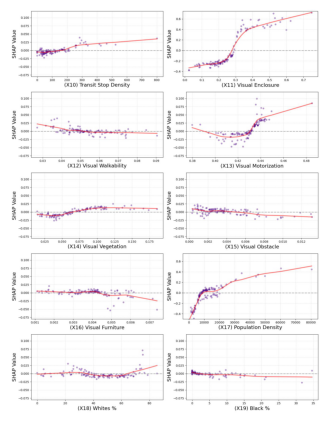

Combined image saved successfully to './SHAP/combined_0.jpg'

Processing batch 2/3 (10 images)...
Target size for this batch set to: (712, 380) (from X1_Building_Density_shap_dependence_styled.jpg)
Resizing 'X20_Asian___shap_dependence_styled.jpg' from (729, 380) to (712, 380)
Resizing 'X21_Ethnic_Diversity_shap_dependence_styled.jpg' from (729, 380) to (712, 380)
Resizing 'X22_Median_Household_Income_shap_dependence_styled.jpg' from (729, 380) to (712, 380)
Resizing 'X23_Felony_Density_shap_dependence_styled.jpg' from (729, 380) to (712, 380)
Resizing 'X2_POI_Density_shap_dependence_styled.jpg' from (719, 380) to (712, 380)
Resizing 'X3_Parking_Meter_Density_shap_dependence_styled.jpg' from (729, 380) to (712, 380)
Resizing 'X4_Gini_Simpson_Index_shap_dependence_styled.jpg' from (729, 380) to (712, 380)
Resizing 'X5_Intersection_Density_shap_dependence_styled.jpg' from (729, 380) to (712, 380)


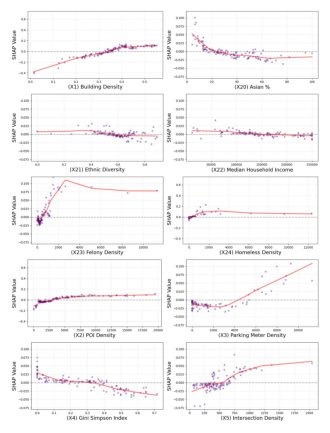

Combined image saved successfully to './SHAP/combined_1.jpg'

Processing batch 3/3 (4 images)...
Target size for this batch set to: (729, 380) (from X6_Open_Space_shap_dependence_styled.jpg)
Adding 6 blank image(s) to fill grid.


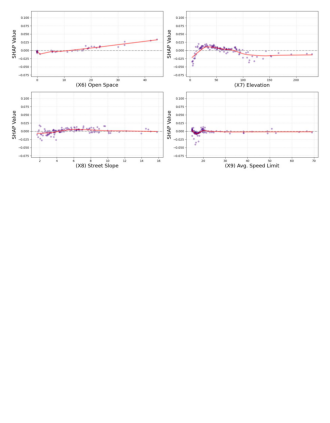

Combined image saved successfully to './SHAP/combined_2.jpg'


In [108]:
from PIL import Image, UnidentifiedImageError # Import specific error
import math # For ceiling division

def combine_images_resized(image_dir, output_dir, rows=2, cols=3):

    try:
        # Filter for JPGs and exclude previously combined images
        all_files = os.listdir(image_dir)
        image_files = sorted([
            f for f in all_files
            if f.lower().endswith('.jpg') and not f.lower().startswith('combined_')
        ])
        print(f"Found {len(image_files)} JPG files to process in '{image_dir}'.")
    except FileNotFoundError:
        print(f"Error: Input directory not found: '{image_dir}'")
        return
    except Exception as e:
        print(f"Error reading image directory '{image_dir}': {e}")
        return

    if not image_files:
        print("No suitable JPG images found to process.")
        return

    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    images_per_grid = rows * cols
    num_grids = math.ceil(len(image_files) / images_per_grid) # Calculate total grids needed

    for grid_index in range(num_grids):
        start_index = grid_index * images_per_grid
        end_index = start_index + images_per_grid
        batch_files = image_files[start_index:end_index]

        if not batch_files:
            continue # Should not happen with ceil, but safety check

        print(f"\nProcessing batch {grid_index + 1}/{num_grids} ({len(batch_files)} images)...")

        images_in_grid = []
        target_size = None
        first_image_path = os.path.join(image_dir, batch_files[0])

        # --- Determine target size from the first image ---
        try:
            with Image.open(first_image_path) as img:
                target_size = img.size
                print(f"Target size for this batch set to: {target_size} (from {batch_files[0]})")
        except (FileNotFoundError, UnidentifiedImageError, Exception) as e:
            print(f"Error opening first image '{batch_files[0]}' to determine size: {e}. Skipping batch.")
            continue # Skip this batch if target size cannot be determined

        # --- Load, resize (if needed), and collect images for the grid ---
        for filename in batch_files:
            image_path = os.path.join(image_dir, filename)
            try:
                with Image.open(image_path) as img:
                    # Ensure image is in RGB mode
                    img = img.convert('RGB')
                    if img.size != target_size:
                        print(f"Resizing '{filename}' from {img.size} to {target_size}")
                        # Use high-quality resampling filter
                        img = img.resize(target_size, Image.Resampling.LANCZOS)
                    images_in_grid.append(img.copy()) # Append a copy
            except (FileNotFoundError, UnidentifiedImageError, Exception) as e:
                print(f"Warning: Error processing image '{filename}': {e}. Skipping this image.")
                # Optionally add a blank placeholder here if strict grid filling is needed
                # images_in_grid.append(Image.new('RGB', target_size, 'lightgrey')) # Example placeholder

        # --- Pad with blank images if necessary ---
        num_missing = images_per_grid - len(images_in_grid)
        if num_missing > 0:
            print(f"Adding {num_missing} blank image(s) to fill grid.")
            for _ in range(num_missing):
                images_in_grid.append(Image.new('RGB', target_size, 'white'))

        # --- Create and populate the composite image ---
        grid_width = target_size[0] * cols
        grid_height = target_size[1] * rows
        new_image = Image.new('RGB', (grid_width, grid_height), 'white')

        for index, img in enumerate(images_in_grid):
            row_num = index // cols
            col_num = index % cols
            x_offset = col_num * target_size[0]
            y_offset = row_num * target_size[1]
            new_image.paste(img, (x_offset, y_offset))
            # No need to close images opened with 'with Image.open(...)'

        # --- Save the combined image ---
        output_filename = f"combined_{grid_index}.jpg"
        output_filepath = os.path.join(output_dir, output_filename)

        # --- Display the combined image
        plt.figure(figsize=(cols * 2, rows * 2)) # Adjust figure size dynamically
        plt.imshow(new_image)
        plt.axis('off') # Hide axes
        plt.show()

        try:
            new_image.save(output_filepath)
            print(f"Combined image saved successfully to '{output_filepath}'")
        except Exception as e:
            print(f"Error saving combined image '{output_filepath}': {e}")

############################################################

#  usage:
image_directory = './SHAP'  # Replace with your input directory containing the SHAP JPGs
output_directory = image_directory # Output directory (can be the same)

combine_images_resized(image_directory, output_directory, rows=5, cols=2)


### OLS

In [109]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Define X and log-transformed y
# Instead of dropping columns with ANY NaNs after conversion, drop only ROWS with NaNs
X = df_cleaned.drop(columns=['crash_den', 'geometry', 'crash_coun','Area_km2', 'geoid'])
X = X.apply(pd.to_numeric, errors='coerce')
# Drop rows with NaNs, keeping columns with valid data
X = X.dropna(axis=0, how='any')  # axis=0 for rows, how='any' for any NaN in row
# Re-align y_log with X after dropping rows
y_log = np.log1p(df_cleaned.loc[X.index, 'crash_den'])  # log(1 + y), using X.index

# --------- OLS ---------
X_const_log = sm.add_constant(X)
ols_model_log = sm.OLS(y_log, X_const_log).fit()
ols_summary = ols_model_log.summary()
ols_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              crash_den   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     61.88
Date:                Sun, 04 May 2025   Prob (F-statistic):          3.11e-144
Time:                        14:41:52   Log-Likelihood:                -294.48
No. Observations:                 619   AIC:                             639.0
Df Residuals:                     594   BIC:                             749.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8220      0.828     -0.992      0.321      -2.449       0.805
MedHHInc   -2.478e-07   3.58e-07     -0.691      0.490   -9.52e-07    4.56e-07
Whites         0.0009      0.002      0.460      0.646      -0.003       0.005
Black         -0.0047      0.003     -1.681      0.093      -0.010       0.001
Asian         -0.0016      0.002     -0.868      0.386      -0.005       0.002
Ethics_div     0.0396      0.169      0.235      0.815      -0.292       0.371
Population  1.781e-05   2.24e-06      7.958      0.000    1.34e-05    2.22e-05
Building_d     2.4157      0.311      7.775      0.000       1.805       3.026
Felony_den -4.103e-05    1.8e-05     -2.285      0.023   -7.63e-05   -5.77e-06
Homeless_d  3.083e-06   1.62e-05      0.190      0.849   -2.87e-05    3.49e-05
commerci_1 -1.454e-05   4.98e-06     -2.920      0.004   -2.43e-05   -4.76e-06
open_space     0.0029      0.001      2.445      0.015       0.001       0.005
intersecti     0.0002   6.83e-05      2.883      0.004    6.27e-05       0.000
parking_me  4.415e-05   1.08e-05      4.084      0.000    2.29e-05    6.54e-05
VMI            3.8400      1.762      2.179      0.030       0.379       7.301
avg_speed_     0.0009      0.002      0.421      0.674      -0.003       0.005
mean_eleva    -0.0008      0.001     -1.388      0.166      -0.002       0.000
mean_slope    -0.0054      0.008     -0.674      0.501      -0.021       0.010
SVI_vegeta     2.0665      0.666      3.101      0.002       0.758       3.375
Gini_Simps    -0.1287      0.102     -1.261      0.208      -0.329       0.072
SVI_Obstac     3.9793      6.367      0.625      0.532      -8.526      16.485
SVI_Walkab    -2.0310      1.882     -1.079      0.281      -5.726       1.664
SVI_Furnit    22.7974     19.523      1.168      0.243     -15.546      61.140
SVI_Enclos     1.1931      0.276      4.317      0.000       0.650       1.736
TransitSto     0.0007      0.000      3.928      0.000       0.000       0.001
==============================================================================
Omnibus:                       68.023   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.769
Skew:                           0.624   Prob(JB):                     8.17e-33
Kurtosis:                       5.042   Cond. No.                     2.00e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_pred = sm.add_constant(X)
y_pred = ols_model_log.predict(X_pred)

# MSE, MAE calculation
mse = mean_squared_error(y_log, y_pred)
mae = mean_absolute_error(y_log, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

MSE: 0.1516
MAE: 0.2845
